
Imported Dependencies for Analysis


In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

Load the csv file and show top 5 records from it

In [2]:
df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016_cleaned.csv')

#drop "unnamed:0" column
df.drop("Unnamed: 0", axis = 1, inplace = True)

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,No Developer,No Rating
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,No Developer,No Rating


Shape of the dataset

In [3]:
print("Total number of rows: ", df.shape[0])
print("Total number of columns: ", df.shape[1])

Total number of rows:  16719
Total number of columns:  14


In [4]:
print("Here are all the columns of the dataset: ", df.columns)

Here are all the columns of the dataset:  Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'User_Score', 'Developer', 'Rating'],
      dtype='object')


Last five rows

In [5]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,0.0,0.0,No Developer,No Rating
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,0.0,0.0,No Developer,No Rating
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,0.0,0.0,No Developer,No Rating
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,0.0,0.0,No Developer,No Rating
16718,Winning Post 8 2016,PSV,2016,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,0.0,0.0,No Developer,No Rating


Description of Dataset

In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
count,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000
mean,1974.204019,0.263330,0.145025,0.077602,0.047332,0.533543,33.566003,3.234589
std,252.530614,0.813514,0.503283,0.308818,0.186710,1.547935,35.817714,3.688653
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,0.000000,0.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,7.300000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,9.700000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  int64  
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  User_Score       16719 non-null  float64
 12  Developer        16719 non-null  object 
 13  Rating           16719 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


sales data of each region on Year_of_Release

In [8]:
#Nan values were replaced by 0
sales_by_year = df.groupby('Year_of_Release').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].reset_index()
sales_by_year

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,59.15,24.46,6.70,8.61,98.96
1,1980,10.59,0.67,0.00,0.12,11.38
2,1981,33.40,1.96,0.00,0.32,35.77
3,1982,26.92,1.65,0.00,0.31,28.86
4,1983,7.76,0.80,8.10,0.14,16.79
5,1984,33.28,2.10,14.27,0.70,50.36
6,1985,33.73,4.74,14.56,0.92,53.94
7,1986,12.50,2.84,19.81,1.93,37.07
8,1987,8.46,1.41,11.63,0.20,21.74
9,1988,23.87,6.59,15.76,0.99,47.22


[Text(0.5, 1.0, 'Global Sales by Year (All null/NA values replaced with 0 in red)')]

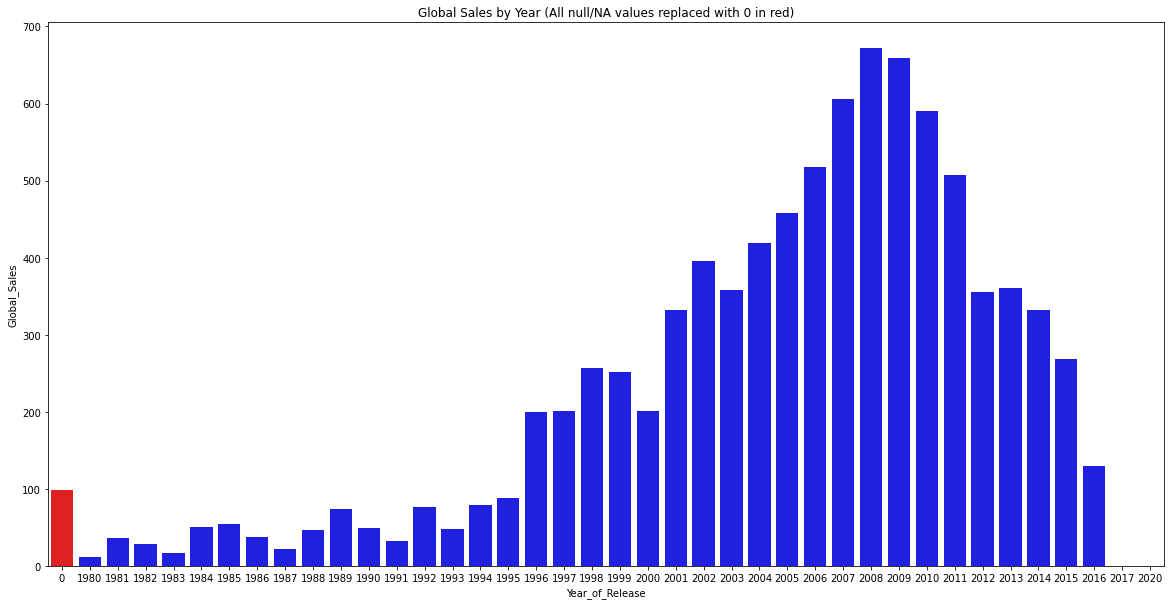

In [9]:

x = sales_by_year['Year_of_Release']
y = sales_by_year['Global_Sales']
clrs = ['red' if (y == 0) else 'blue' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_year, palette=clrs).set(title="Global Sales by Year (All null/NA values replaced with 0 in red)")

[Text(0.5, 1.0, 'North America Sales by Year (All null/NA values replaced with 0 in red)')]

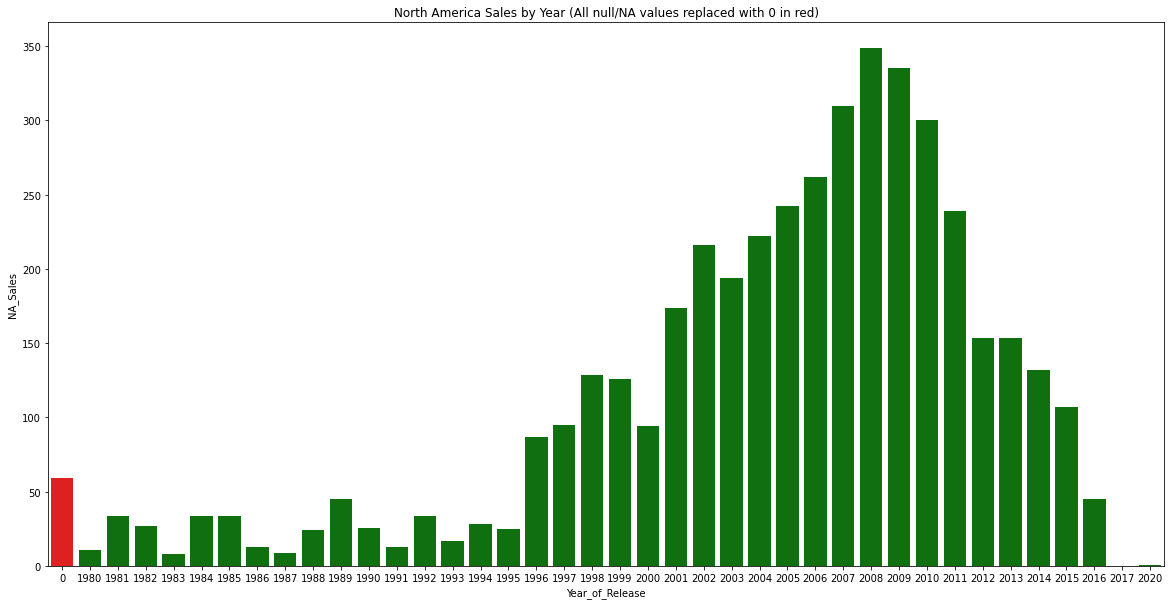

In [10]:
x = sales_by_year['Year_of_Release']
y = sales_by_year['NA_Sales']
clrs = ['red' if (y == 0) else 'green' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_year, palette=clrs).set(title="North America Sales by Year (All null/NA values replaced with 0 in red)")

[Text(0.5, 1.0, 'Japanese Sales by Year (All null/NA values replaced with 0 in red)')]

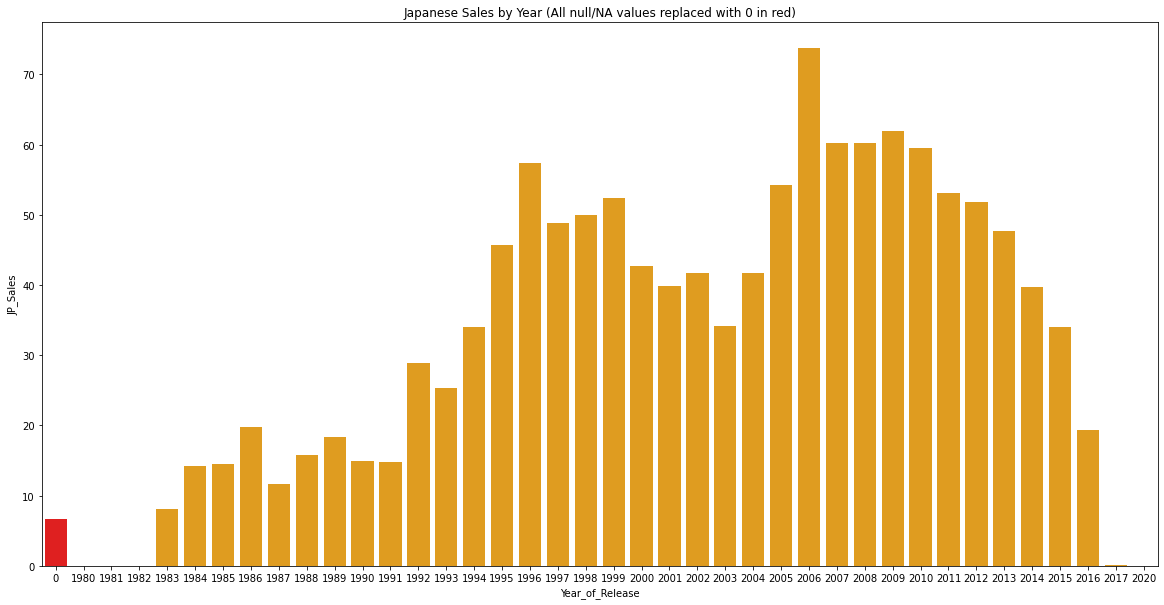

In [11]:
x = sales_by_year['Year_of_Release']
y = sales_by_year['JP_Sales']
clrs = ['red' if (y == 0) else 'orange' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_year, palette=clrs).set(title="Japanese Sales by Year (All null/NA values replaced with 0 in red)")

[Text(0.5, 1.0, 'European Union Sales by Year (All null/NA values replaced with 0 in red)')]

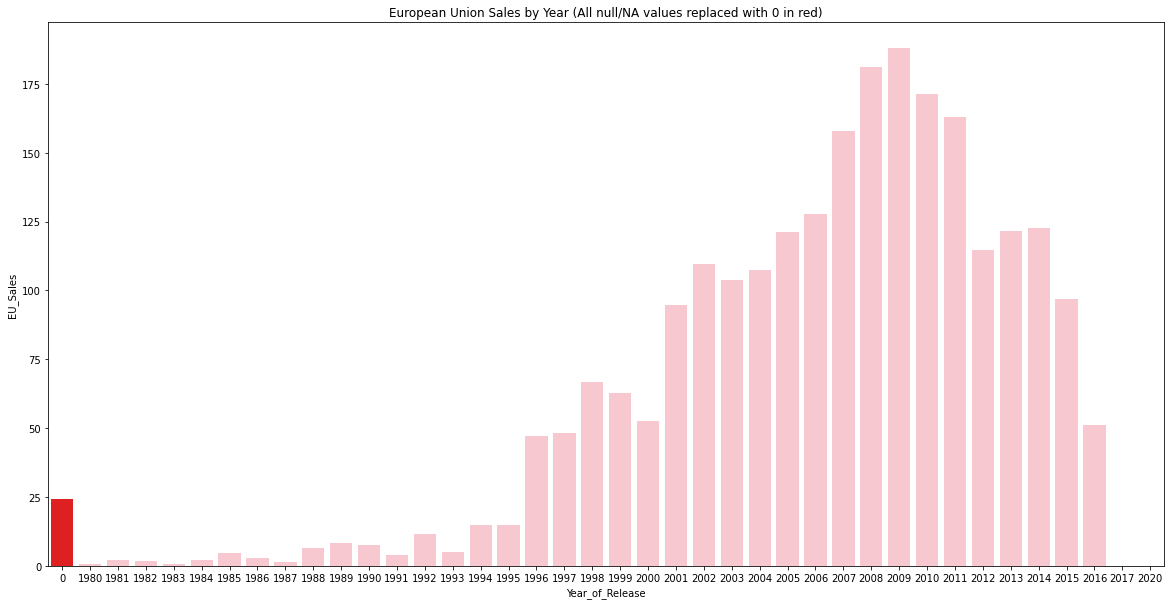

In [12]:
x = sales_by_year['Year_of_Release']
y = sales_by_year['EU_Sales']
clrs = ['red' if (y == 0) else 'pink' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_year, palette=clrs).set(title="European Union Sales by Year (All null/NA values replaced with 0 in red)")

[Text(0.5, 1.0, 'Other Sales by Year (All null/NA values replaced with 0 in red)')]

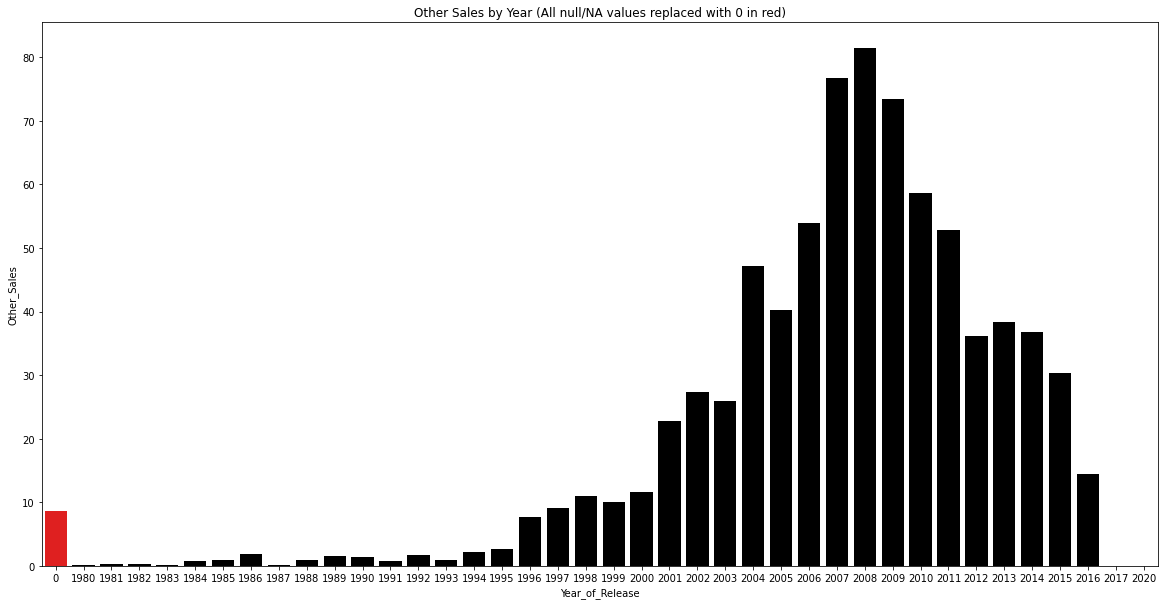

In [13]:
x = sales_by_year['Year_of_Release']
y = sales_by_year['Other_Sales']
clrs = ['red' if (y == 0) else 'black' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_year, palette=clrs).set(title="Other Sales by Year (All null/NA values replaced with 0 in red)")

North American, Japan, European & Other region sales data as per Genre

In [14]:
#Nan values were replaced by "No Genre"
sales_by_genre = df.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].reset_index()
sales_by_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,879.01,519.13,161.44,184.60,1745.27
1,Adventure,105.26,63.54,52.30,16.49,237.69
2,Fighting,223.36,100.33,87.48,36.36,447.48
3,Misc,407.27,212.74,108.11,74.39,803.18
4,No Genre,1.78,0.53,0.03,0.08,2.42
5,Platform,445.50,200.35,130.83,51.09,828.08
6,Puzzle,122.87,50.01,57.31,12.38,243.02
7,Racing,359.35,236.51,56.71,76.10,728.90
8,Role-Playing,330.81,188.71,355.46,59.63,934.40
9,Shooter,592.24,317.34,38.76,104.11,1052.94


[Text(0.5, 1.0, 'Global Sales by Genre (All null/NA values replaced with No Genre')]

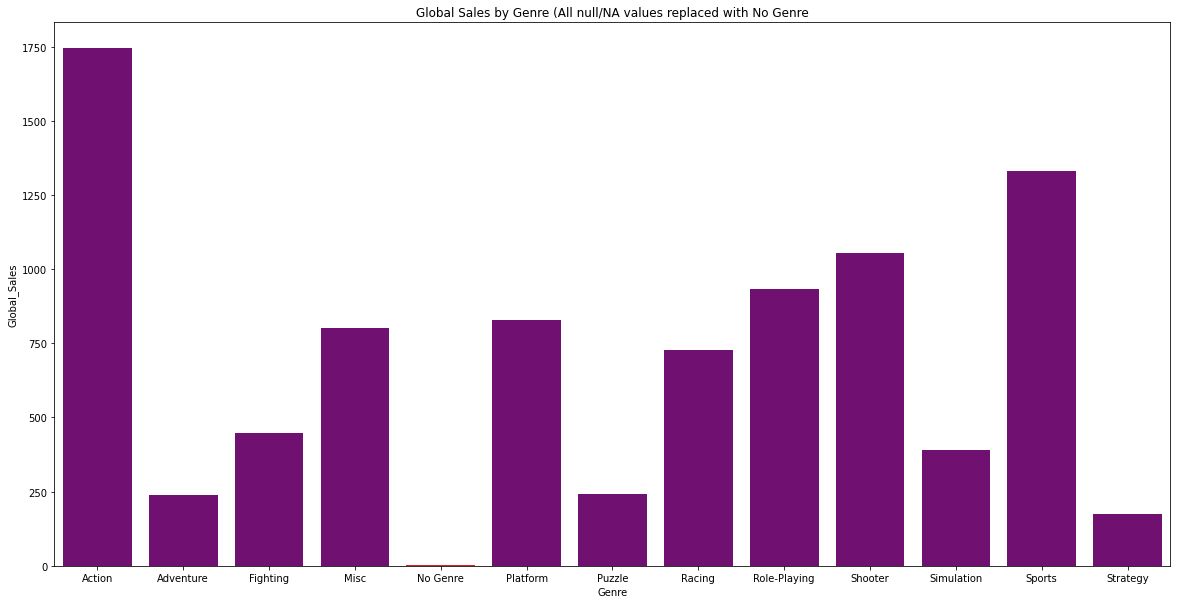

In [15]:
x = sales_by_genre['Genre']
y = sales_by_genre['Global_Sales']
clrs = ['red' if (y == "No Genre") else 'purple' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_genre, palette=clrs).set(title="Global Sales by Genre (All null/NA values replaced with No Genre")

[Text(0.5, 1.0, 'North America Sales by Genre (All null/NA values replaced with No Genre')]

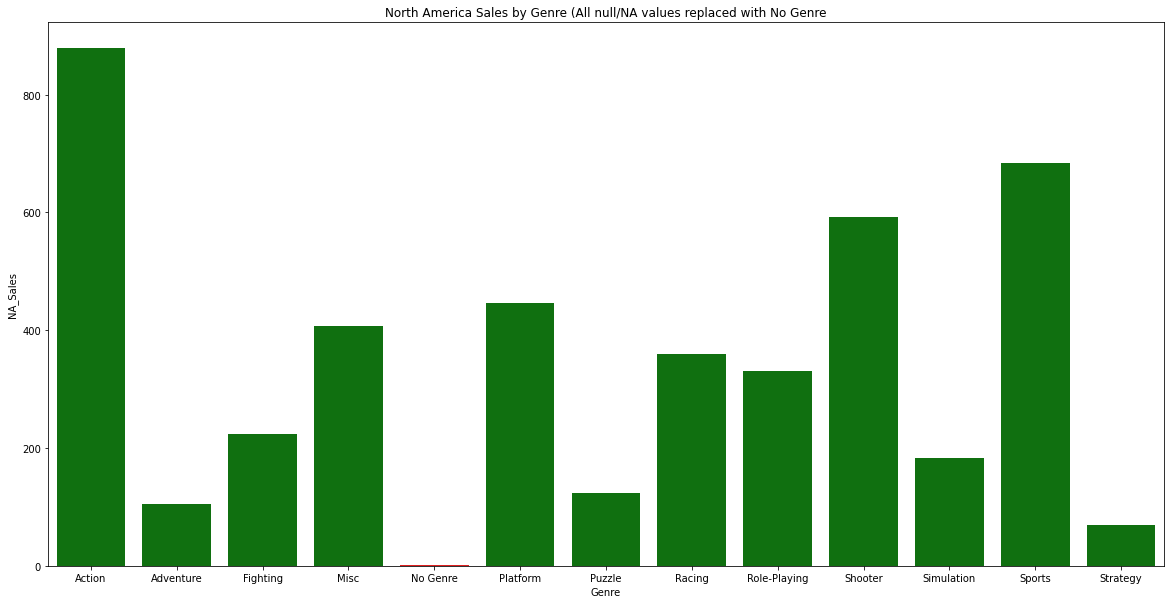

In [16]:
x = sales_by_genre['Genre']
y = sales_by_genre['NA_Sales']
clrs = ['red' if (y == "No Genre") else 'green' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_genre, palette=clrs).set(title="North America Sales by Genre (All null/NA values replaced with No Genre")

[Text(0.5, 1.0, 'Japanese Sales by Genre (All null/NA values replaced with No Genre')]

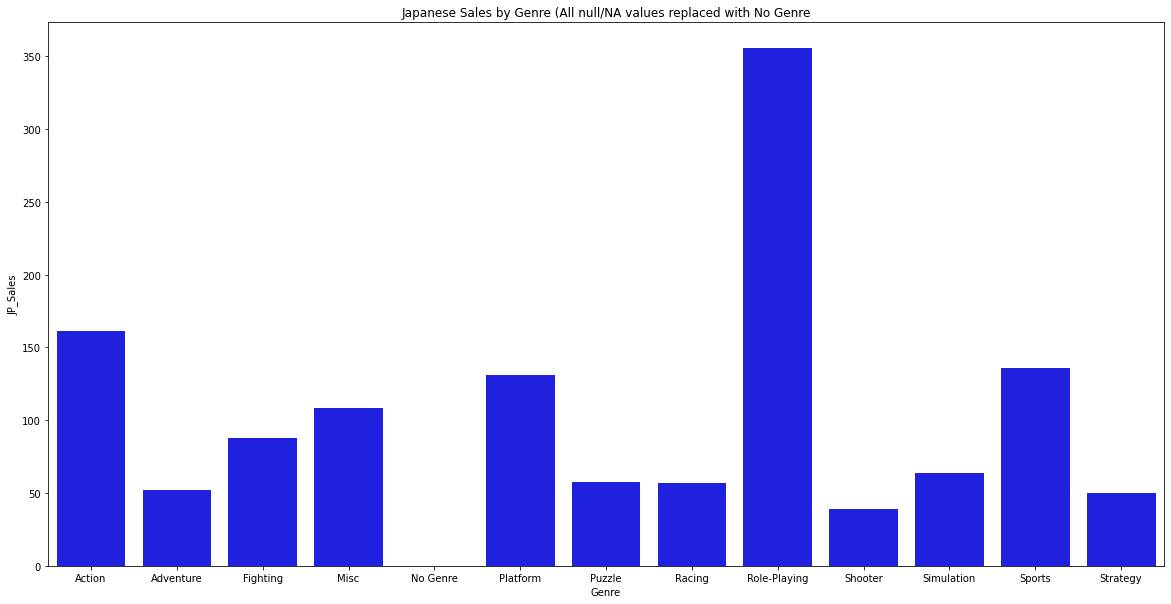

In [17]:
x = sales_by_genre['Genre']
y = sales_by_genre['JP_Sales']
clrs = ['red' if (y == "No Genre") else 'blue' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_genre, palette=clrs).set(title="Japanese Sales by Genre (All null/NA values replaced with No Genre")

As you can see for Sales in Japan, Role-Playing games sold the most, twice as much as action. The Japanese love there role playing games, while other region love their action games, they sold the most in other parts of the world. 

[Text(0.5, 1.0, 'European Union Sales by Genre (All null/NA values replaced with No Genre')]

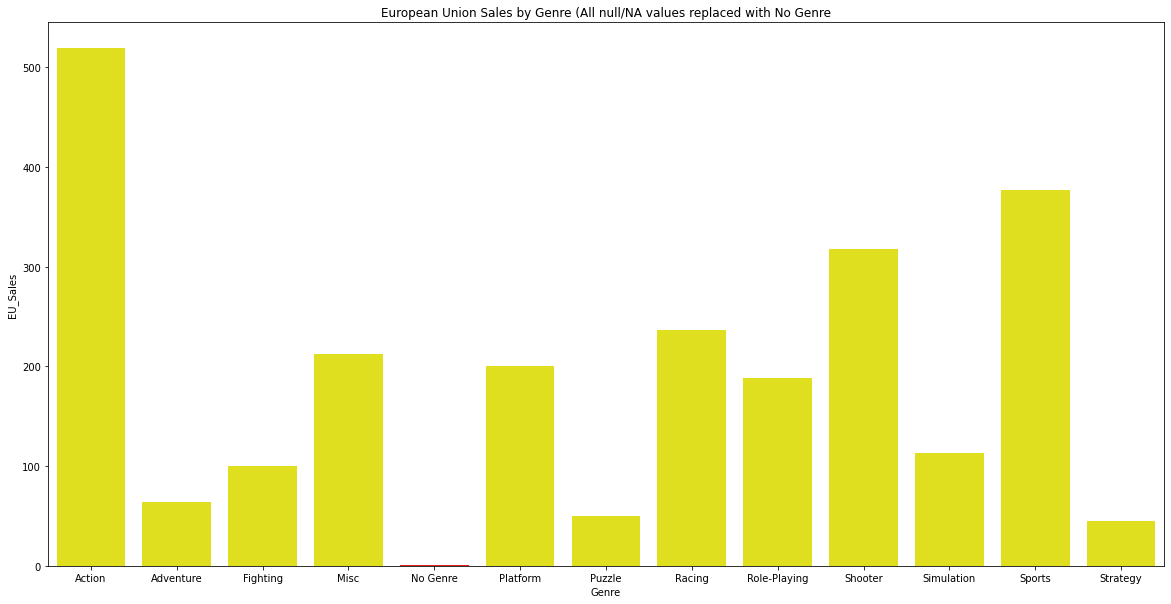

In [18]:
x = sales_by_genre['Genre']
y = sales_by_genre['EU_Sales']
clrs = ['red' if (y == "No Genre") else 'yellow' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_genre, palette=clrs).set(title="European Union Sales by Genre (All null/NA values replaced with No Genre")

[Text(0.5, 1.0, 'Other Sales by Genre (All null/NA values replaced with No Genre')]

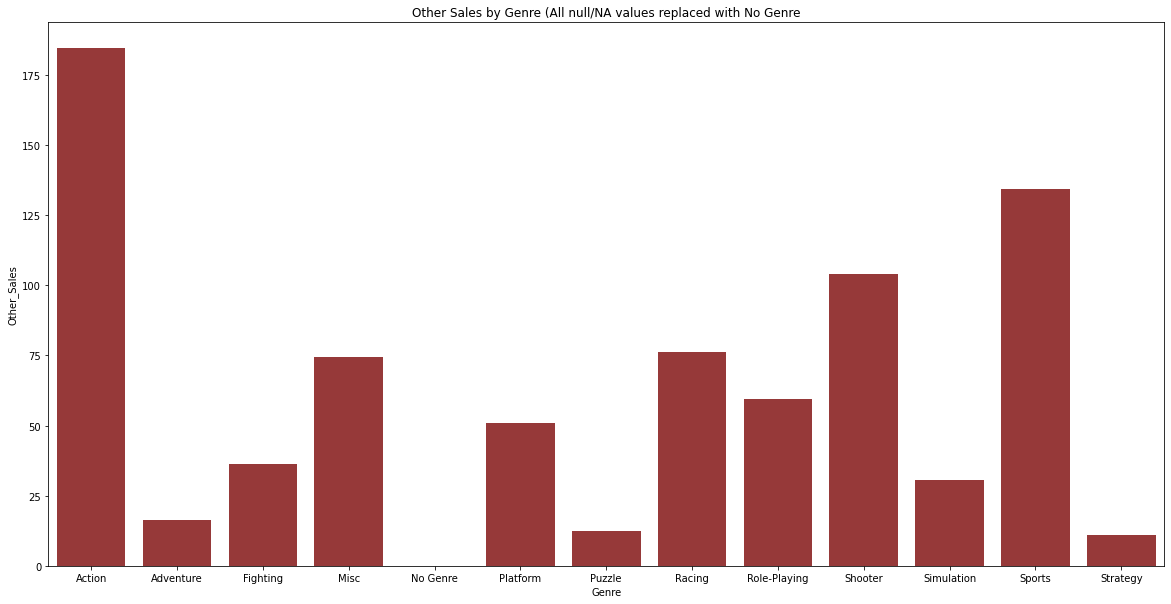

In [19]:
x = sales_by_genre['Genre']
y = sales_by_genre['Other_Sales']
clrs = ['red' if (y == "No Genre") else 'brown' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_genre, palette=clrs).set(title="Other Sales by Genre (All null/NA values replaced with No Genre")

North American, Japan, European & Other region sales data as per Platform 

In [20]:
sales_by_platform = df.groupby('Platform').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].reset_index()
sales_by_platform

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2600,90.60,5.47,0.00,0.91,97.08
1,3DO,0.00,0.00,0.10,0.00,0.10
2,3DS,83.49,61.48,100.67,13.36,259.09
3,DC,5.43,1.69,8.56,0.27,15.97
4,DS,382.67,188.89,175.57,59.28,807.10
5,GB,114.32,47.82,85.12,8.20,255.45
6,GBA,187.54,75.25,47.33,7.73,318.50
7,GC,133.46,38.71,21.58,5.18,199.36
8,GEN,21.05,6.05,2.70,0.97,30.78
9,GG,0.00,0.00,0.04,0.00,0.04


[Text(0.5, 1.0, 'Global Sales by Platform ')]

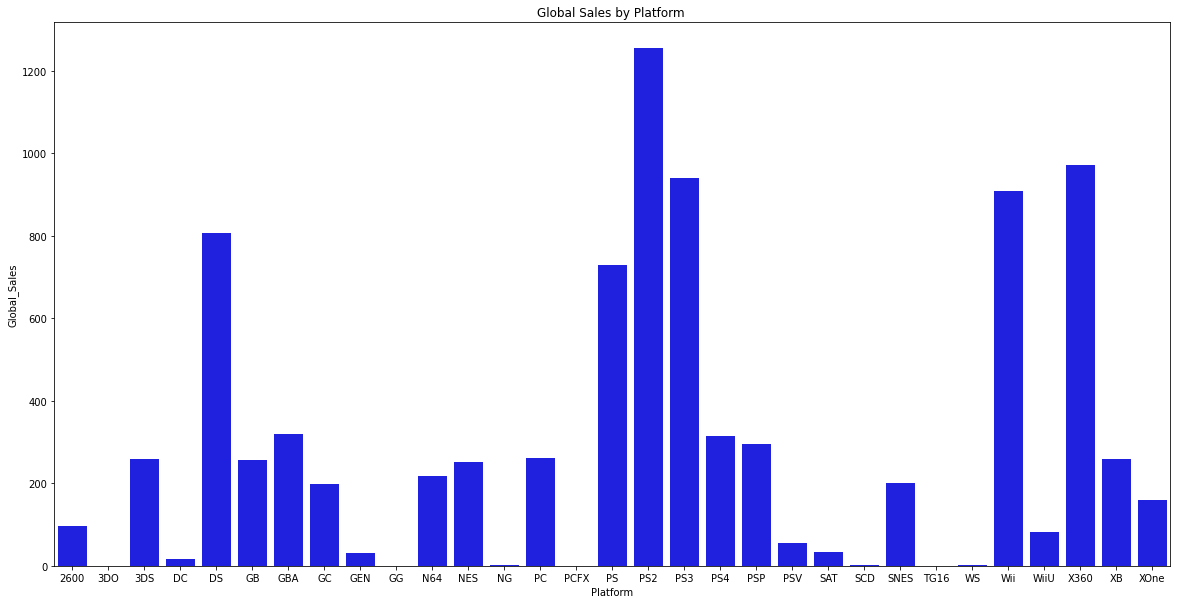

In [21]:
x = sales_by_platform['Platform']
y = sales_by_platform['Global_Sales']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_platform, color='blue').set(title="Global Sales by Platform ")

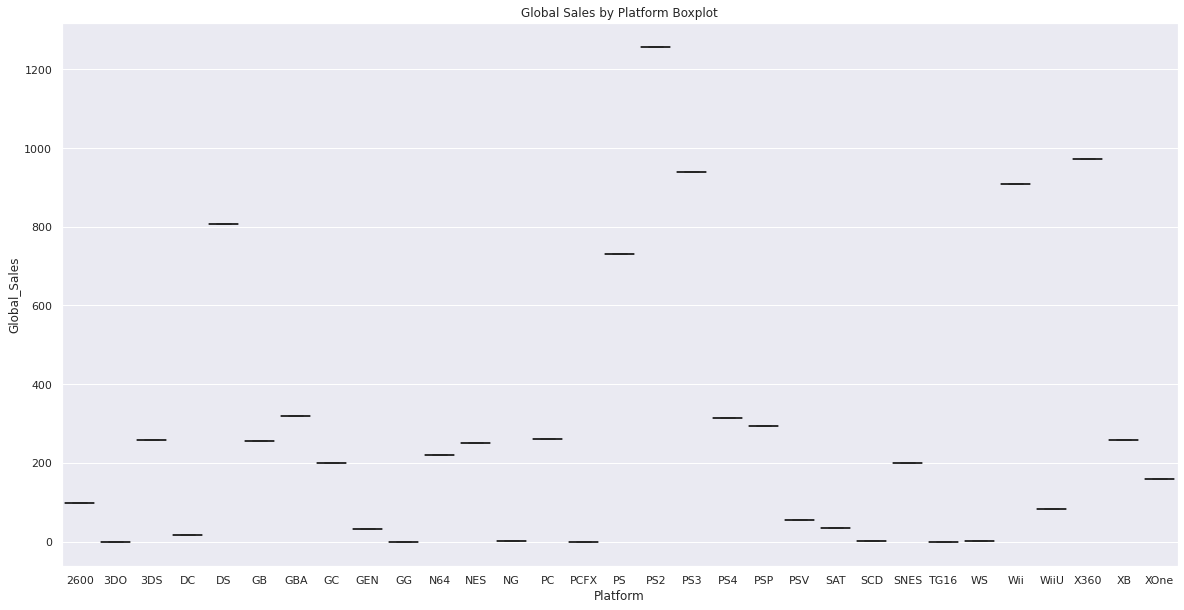

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(x='Platform', y='Global_Sales', data=sales_by_platform, palette="Blues").set(title="Global Sales by Platform Boxplot")
plt.show()

[Text(0.5, 1.0, 'European Union by Platform')]

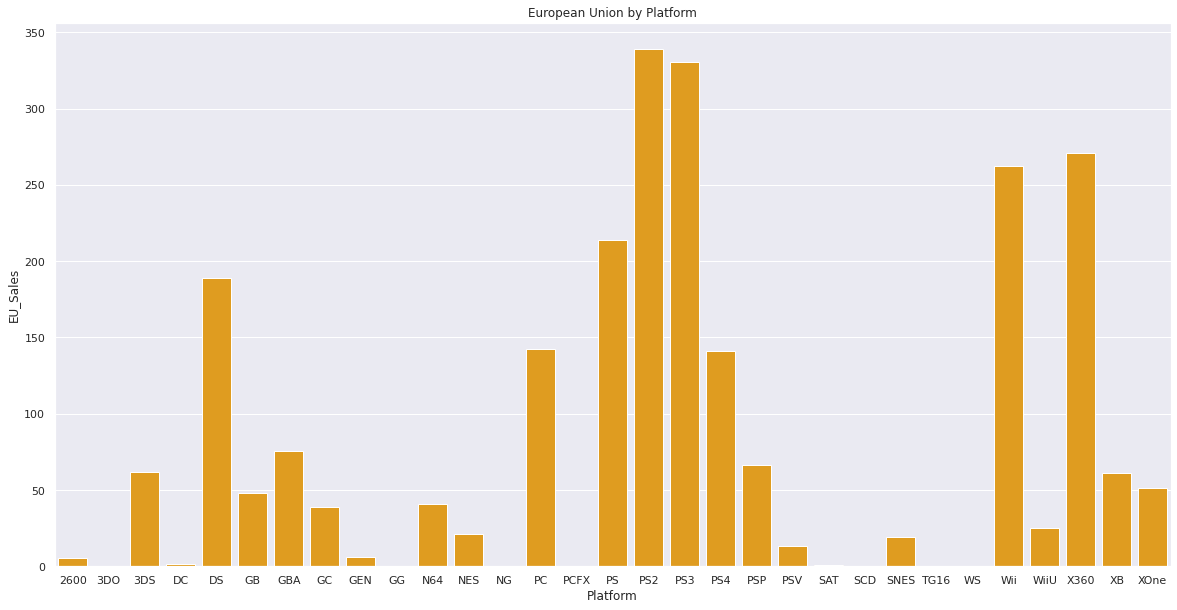

In [23]:
x = sales_by_platform['Platform']
y = sales_by_platform['EU_Sales']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_platform, color='orange').set(title="European Union by Platform")

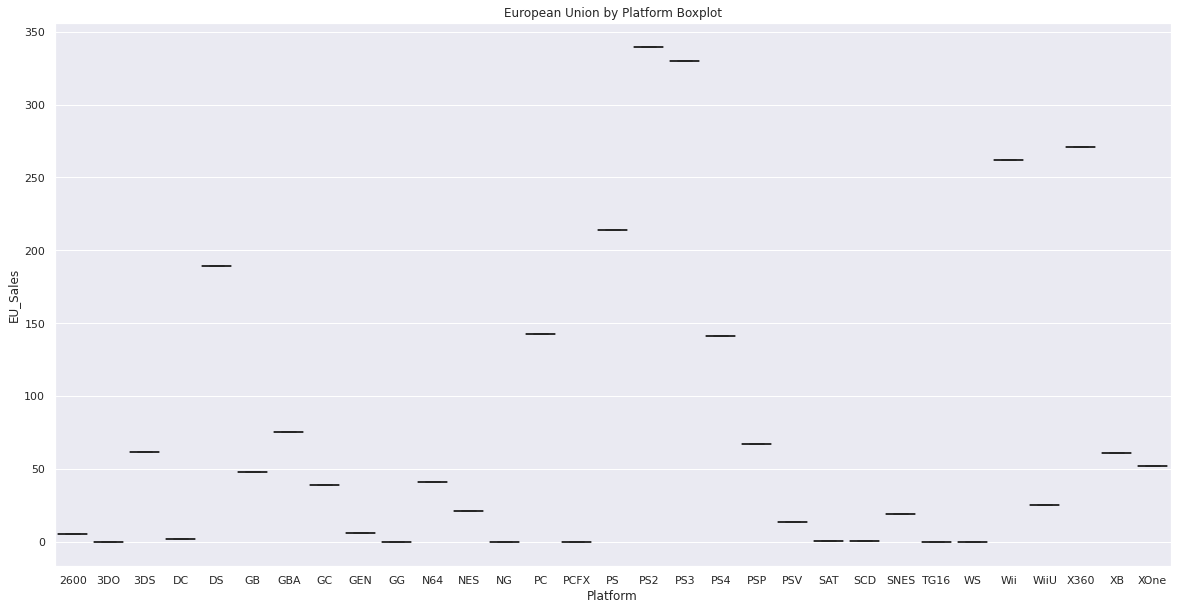

In [24]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(x='Platform', y='EU_Sales', data=sales_by_platform, palette="Blues").set(title="European Union by Platform Boxplot")
plt.show()

[Text(0.5, 1.0, 'North America Sales by Platform')]

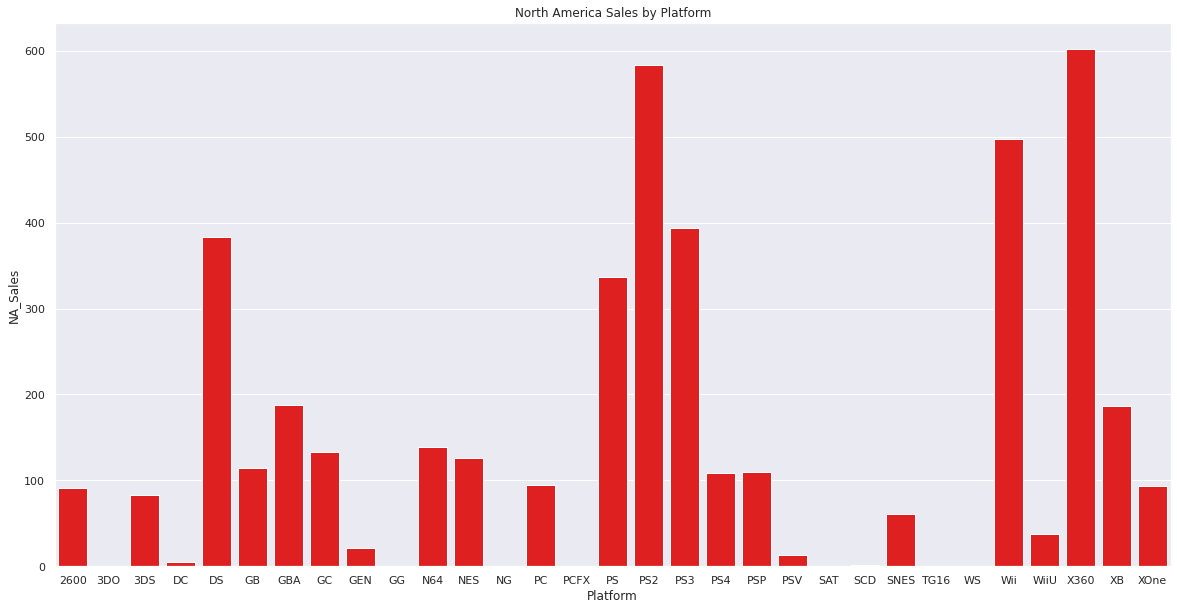

In [25]:
x = sales_by_platform['Platform']
y = sales_by_platform['NA_Sales']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_platform, color='red').set(title="North America Sales by Platform")

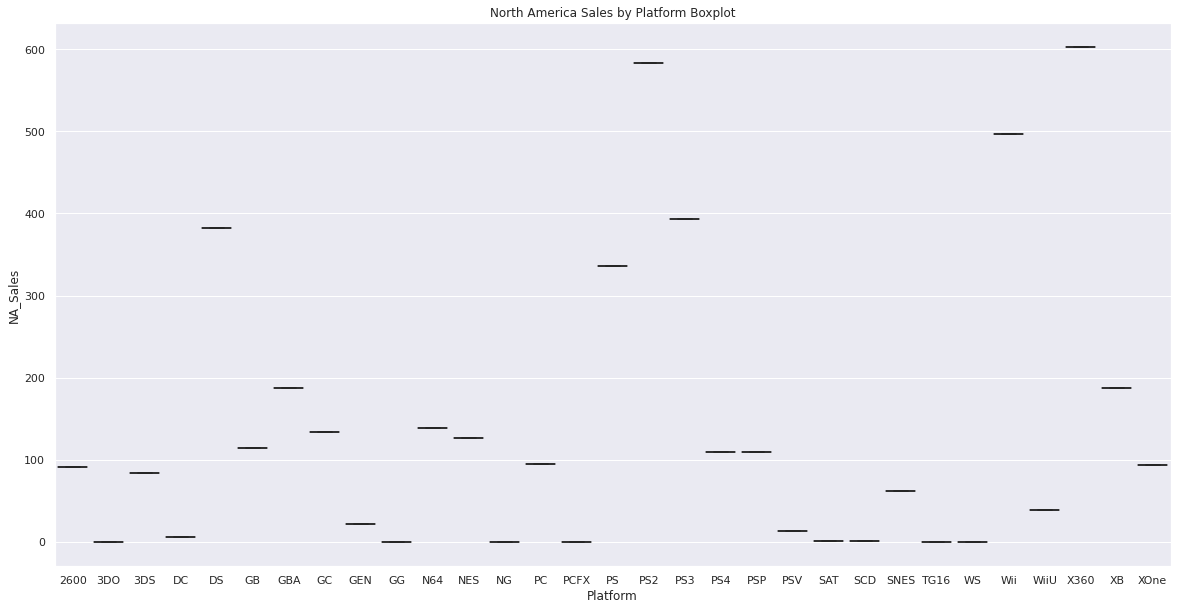

In [26]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(x='Platform', y='NA_Sales', data=sales_by_platform, palette="Blues").set(title="North America Sales by Platform Boxplot")
plt.show()

[Text(0.5, 1.0, 'Japanese Sales by Platform')]

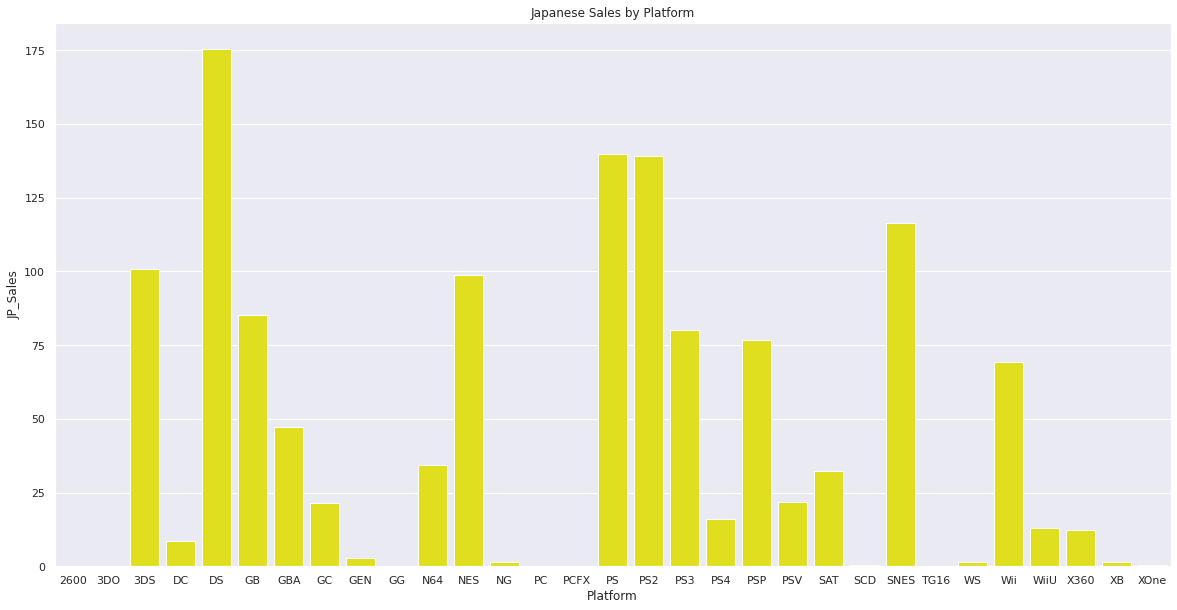

In [27]:
x = sales_by_platform['Platform']
y = sales_by_platform['JP_Sales']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_platform, color='yellow').set(title="Japanese Sales by Platform")

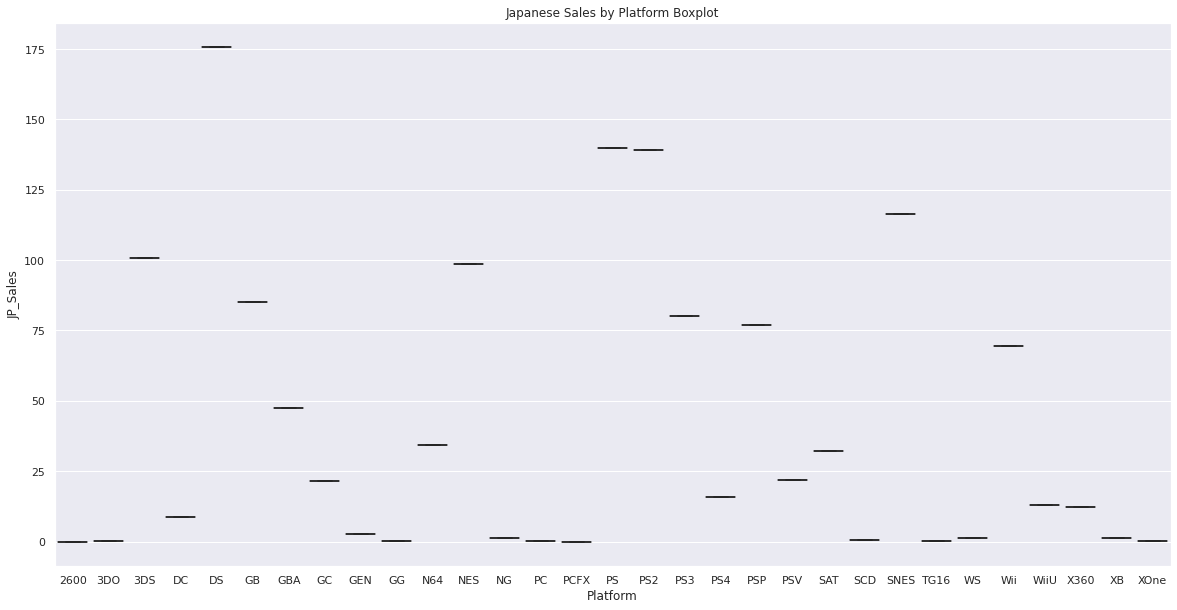

In [28]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(x='Platform', y='JP_Sales', data=sales_by_platform, palette="Blues").set(title="Japanese Sales by Platform Boxplot")
plt.show()

[Text(0.5, 1.0, 'Other Sales by Platform')]

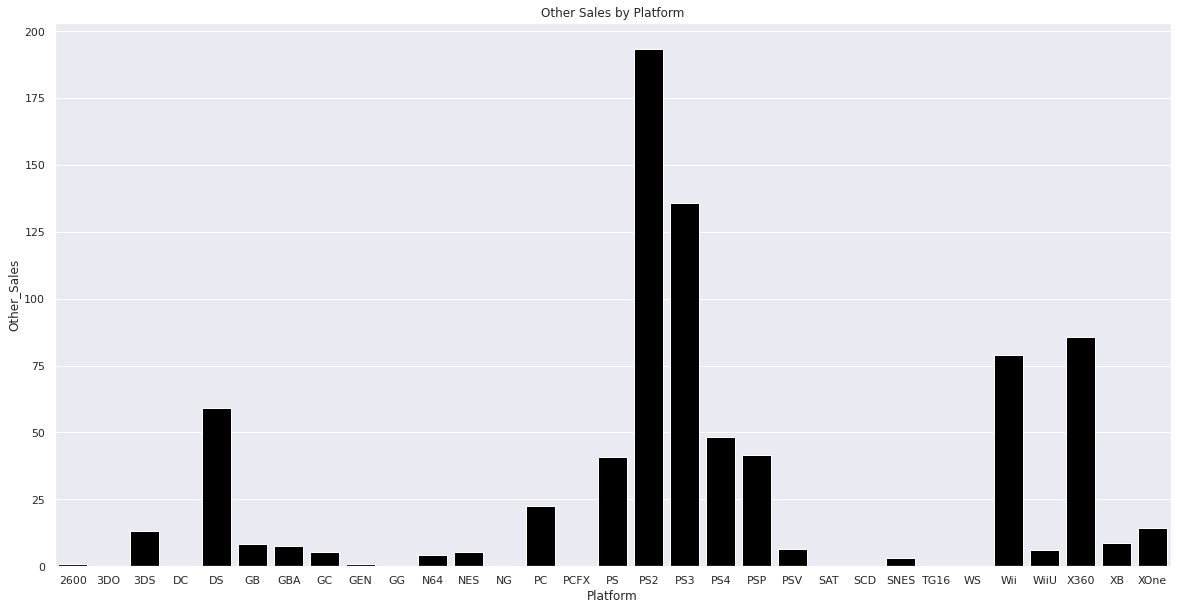

In [29]:
x = sales_by_platform['Platform']
y = sales_by_platform['Other_Sales']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_platform, color='black').set(title="Other Sales by Platform")

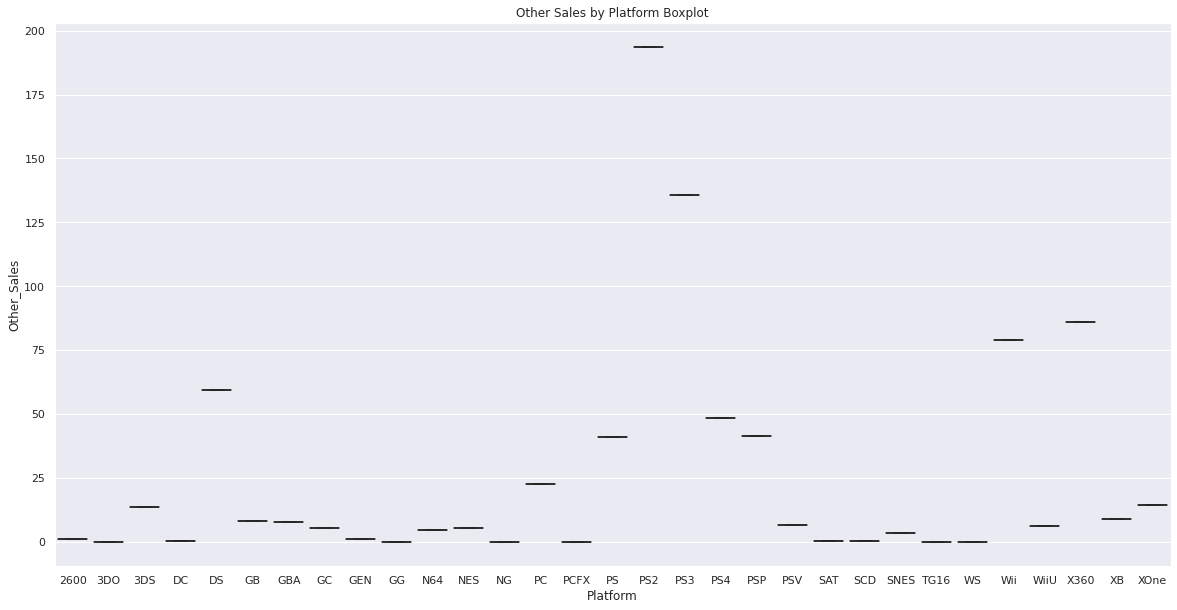

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(x='Platform', y='Other_Sales', data=sales_by_platform, palette="Blues").set(title="Other Sales by Platform Boxplot")
plt.show()

In [31]:
games_by_genre = df.groupby('Genre').count()[['Name']].reset_index()
games_by_genre.rename(columns={'Name':'Count'}, inplace=True)
games_by_genre

,Genre,Count
0,Action,3370
1,Adventure,1303
2,Fighting,849
3,Misc,1750
4,No Genre,2
5,Platform,888
6,Puzzle,580
7,Racing,1249
8,Role-Playing,1500
9,Shooter,1323


[Text(0.5, 1.0, 'Other Sales by Platform')]

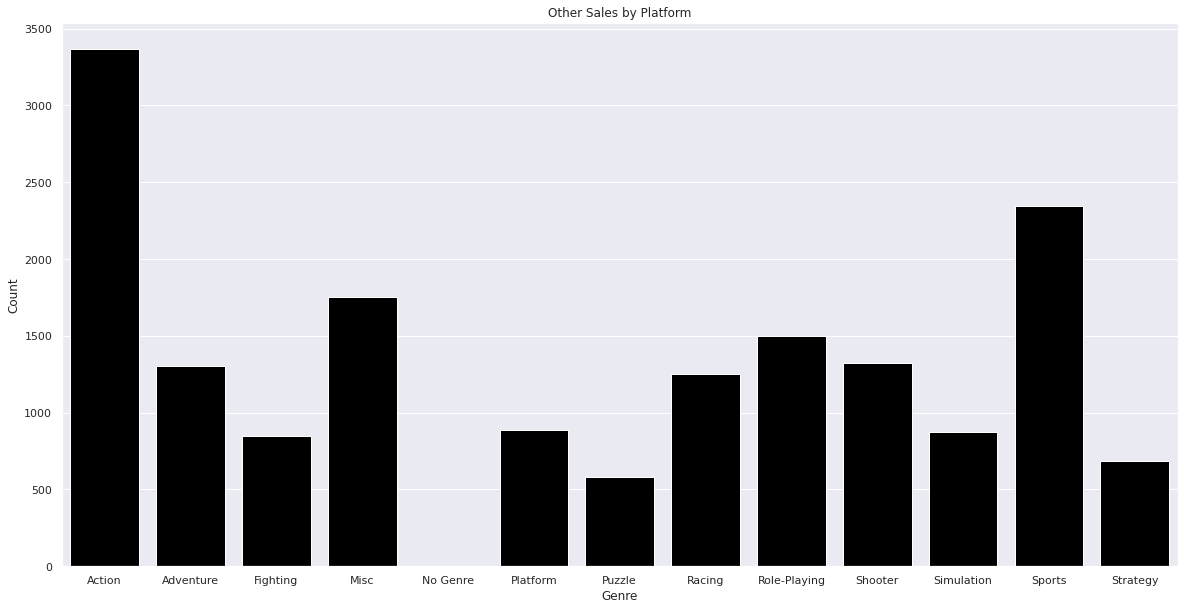

In [32]:
x = games_by_genre['Genre']
y = games_by_genre['Count']
games_by_genre.rename(columns={'Name':'Count'}, inplace=True)
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_platform, color='black').set(title="Other Sales by Platform")

The Genre that sold the most games was Action, followed in second place: Sports.


Which Platform had the most games?

In [33]:
platform_games_count = df.groupby('Platform').count()[['Name']].reset_index()
platform_games_count.rename(columns={'Name':'Count'}, inplace=True)
platform_games_count

,Platform,Count
0,2600,133
1,3DO,3
2,3DS,520
3,DC,52
4,DS,2152
5,GB,98
6,GBA,822
7,GC,556
8,GEN,29
9,GG,1


AttributeError: ignored

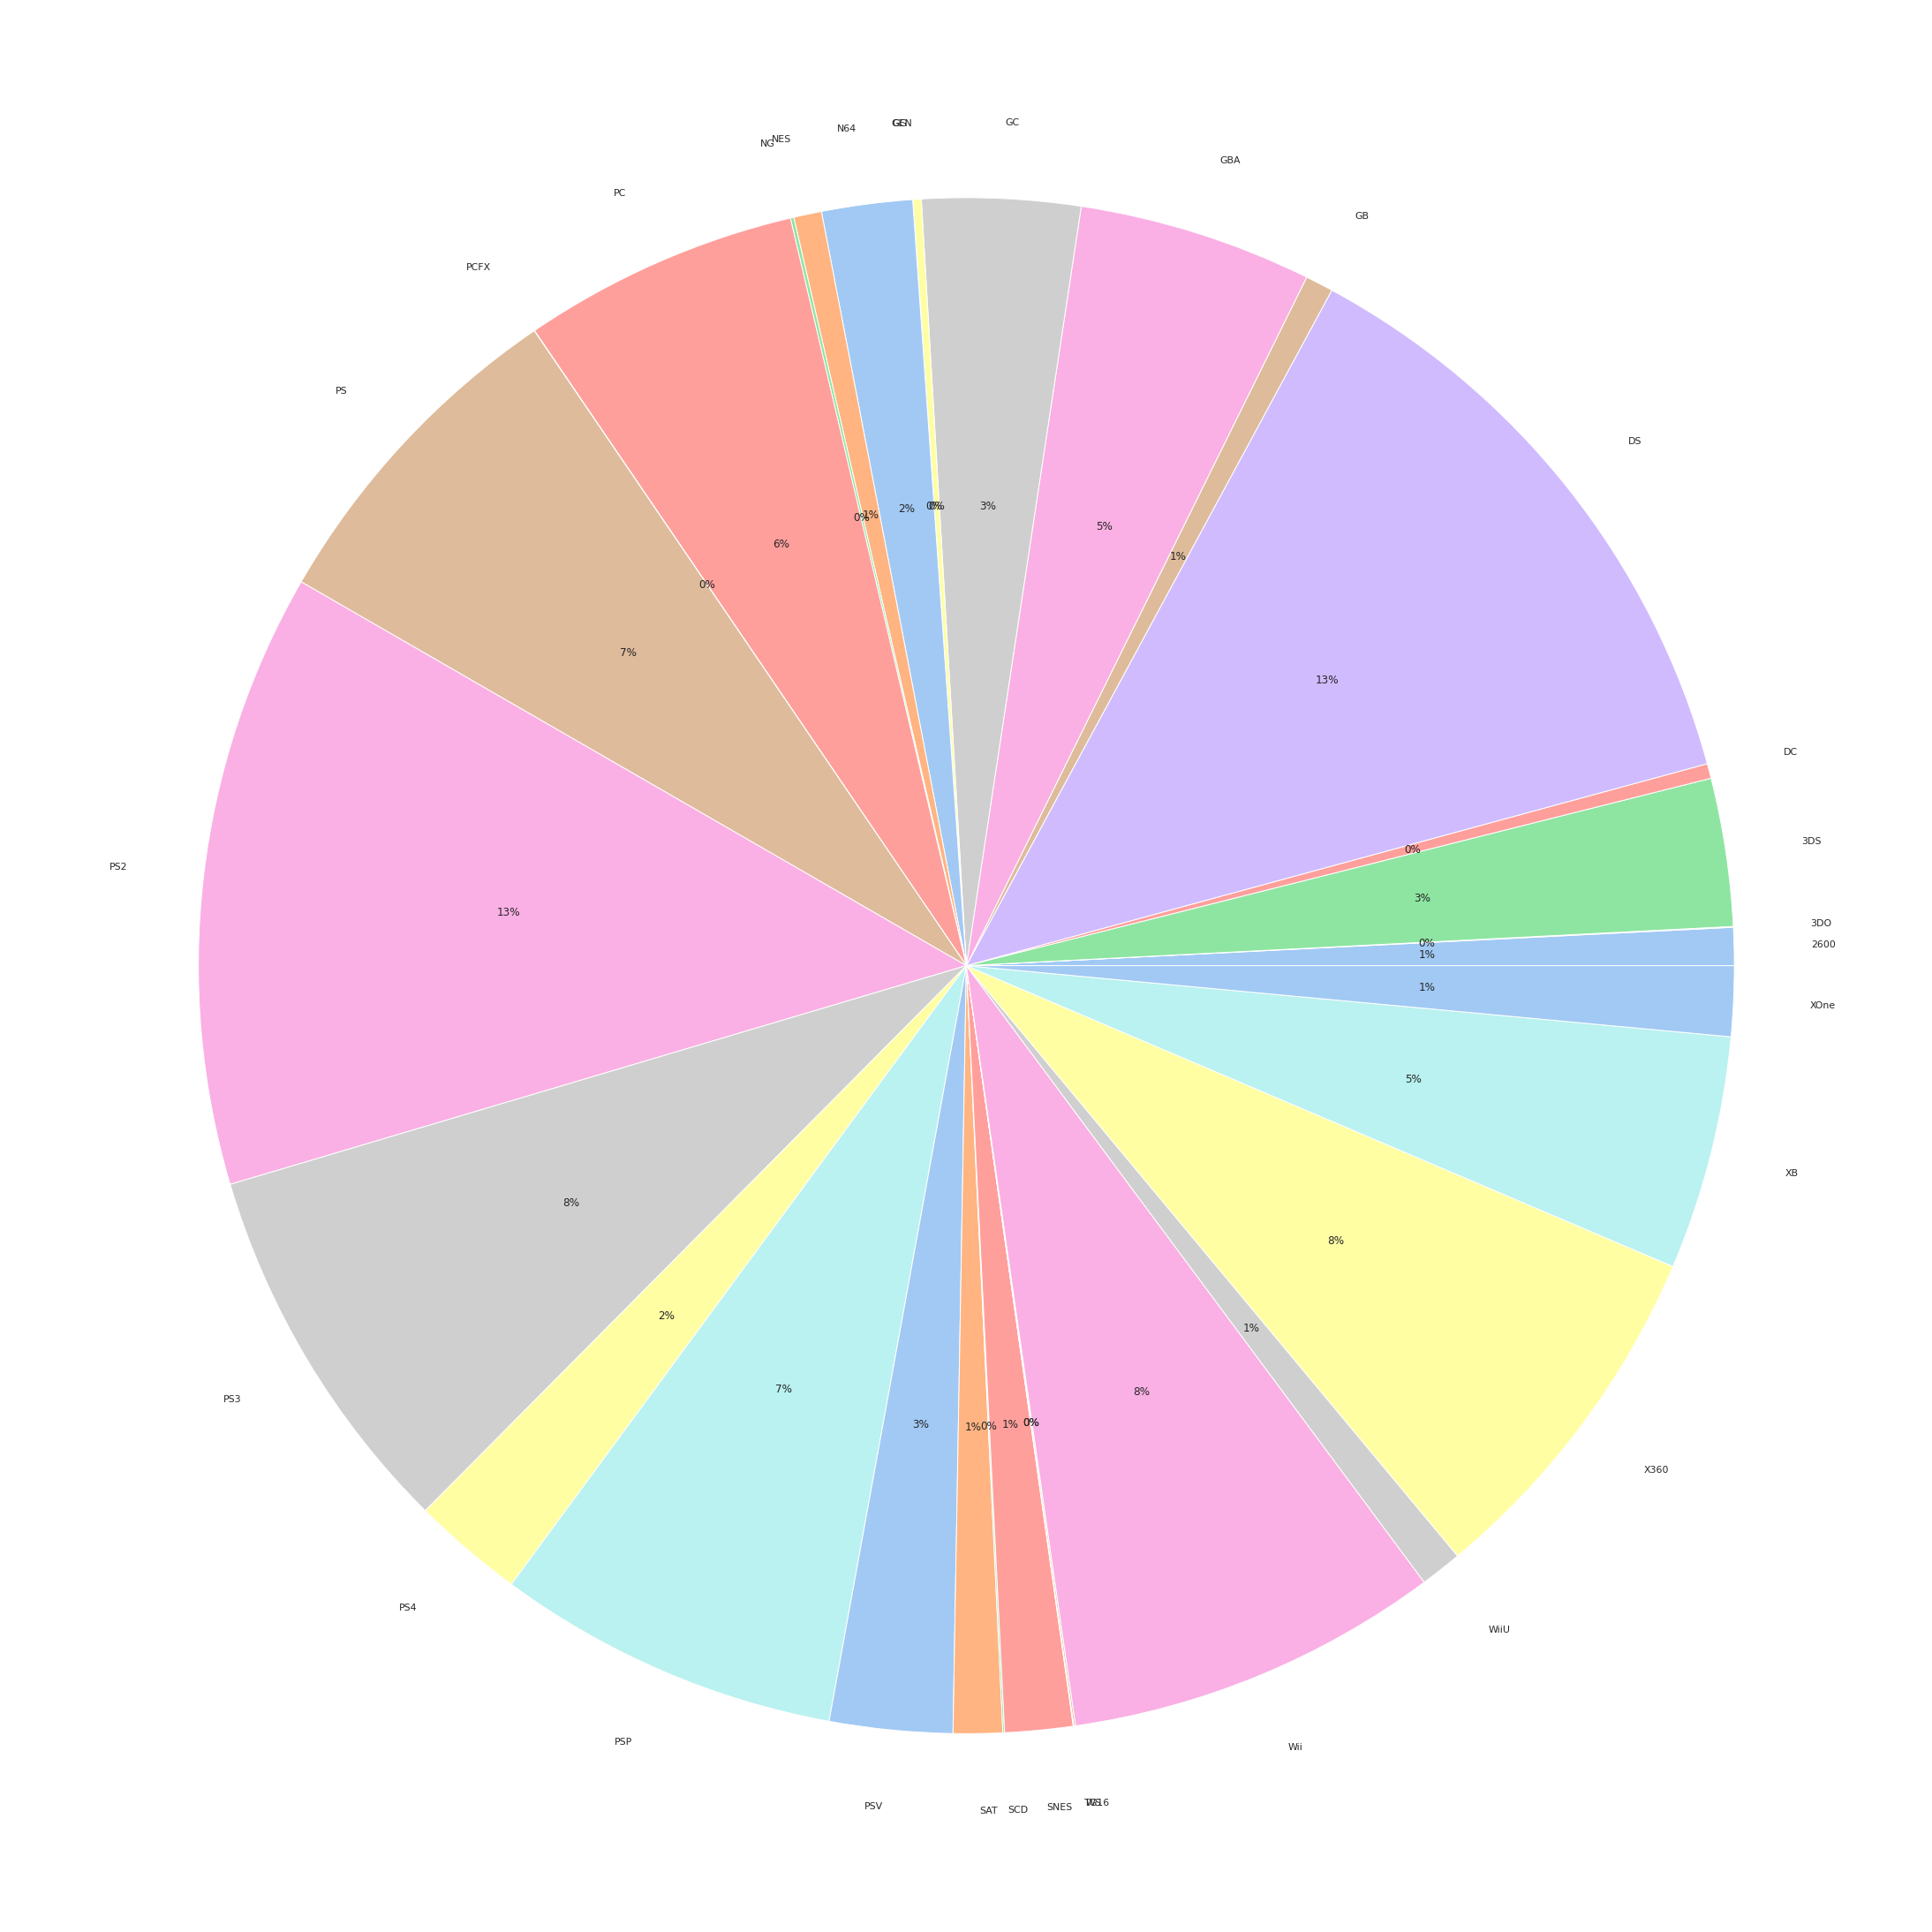

In [34]:
#define data
data = platform_games_count['Count']
labels = platform_games_count['Platform']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:30]

plt.figure(figsize=(40,40))

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

The platforms that have the most are: PS4, Wii, Xbox360, DS, PS2. Had 8-13% of the games. Platforms that sold the least were: SAT, SCD, SNES, GB, etc. having only 0-2% of the games in the entire dataset.

Which Rating Sold the Most

In [35]:
#Nan values were replaced by "No Rating"
sales_by_game_rating = df.groupby('Rating').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].reset_index()
sales_by_game_rating

,Rating,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,AO,1.26,0.61,0.00,0.09,1.95
1,E,1293.26,710.25,198.11,234.19,2436.90
2,E10+,353.32,188.52,40.20,73.56,655.81
3,EC,1.53,0.11,0.00,0.11,1.78
4,K-A,2.56,0.27,1.46,0.03,4.33
5,M,748.48,483.97,64.24,177.10,1473.84
6,No Rating,1242.46,613.83,842.02,151.08,2851.21
7,RP,0.00,0.08,0.00,0.01,0.08
8,T,759.75,427.03,151.40,155.17,1494.40


[Text(0.5, 1.0, 'Global Sales by Rating (All null/NA values replaced with No Rating in red)')]

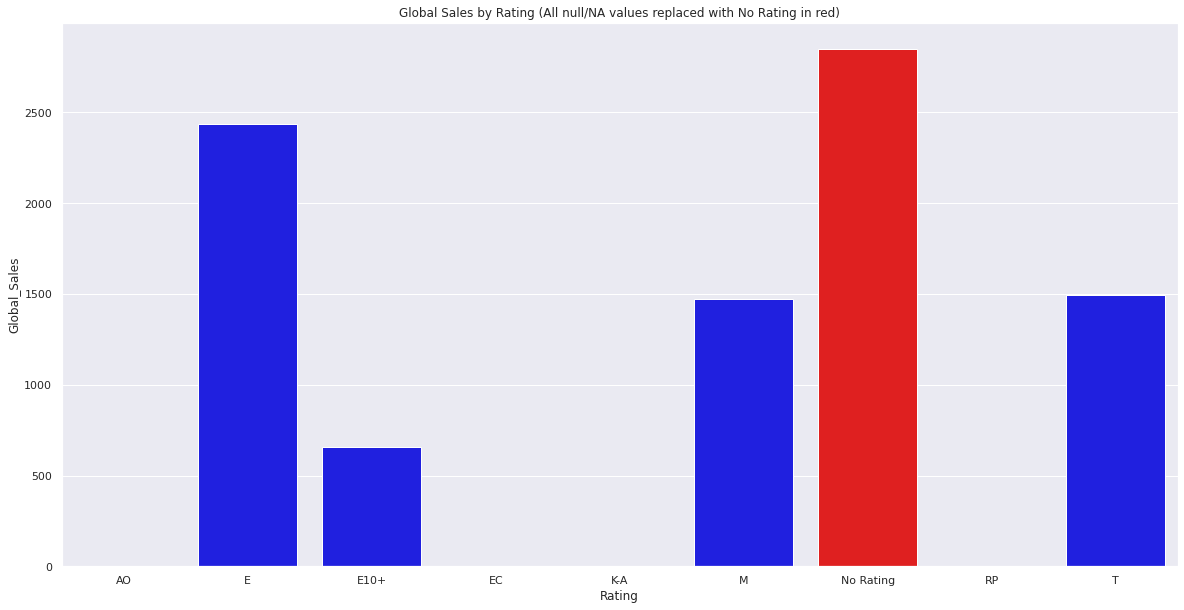

In [36]:
x = sales_by_game_rating['Rating']
y = sales_by_game_rating['Global_Sales']
clrs = ['red' if (y == "No Rating") else 'blue' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_game_rating, palette=clrs).set(title="Global Sales by Rating (All null/NA values replaced with No Rating in red)")

[Text(0.5, 1.0, 'Japan Sales by Rating (All null/NA values replaced with No Rating in red)')]

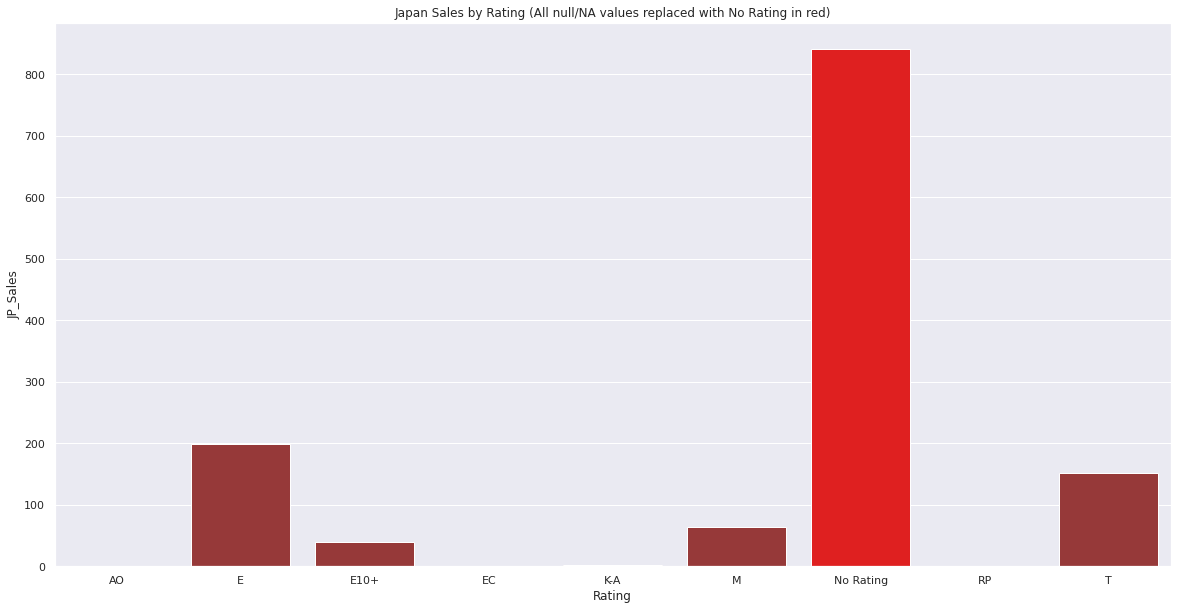

In [37]:
x = sales_by_game_rating['Rating']
y = sales_by_game_rating['JP_Sales']
clrs = ['red' if (y == "No Rating") else 'brown' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_game_rating, palette=clrs).set(title="Japan Sales by Rating (All null/NA values replaced with No Rating in red)")

[Text(0.5, 1.0, 'North America Sales by Rating (All null/NA values replaced with No Rating in red)')]

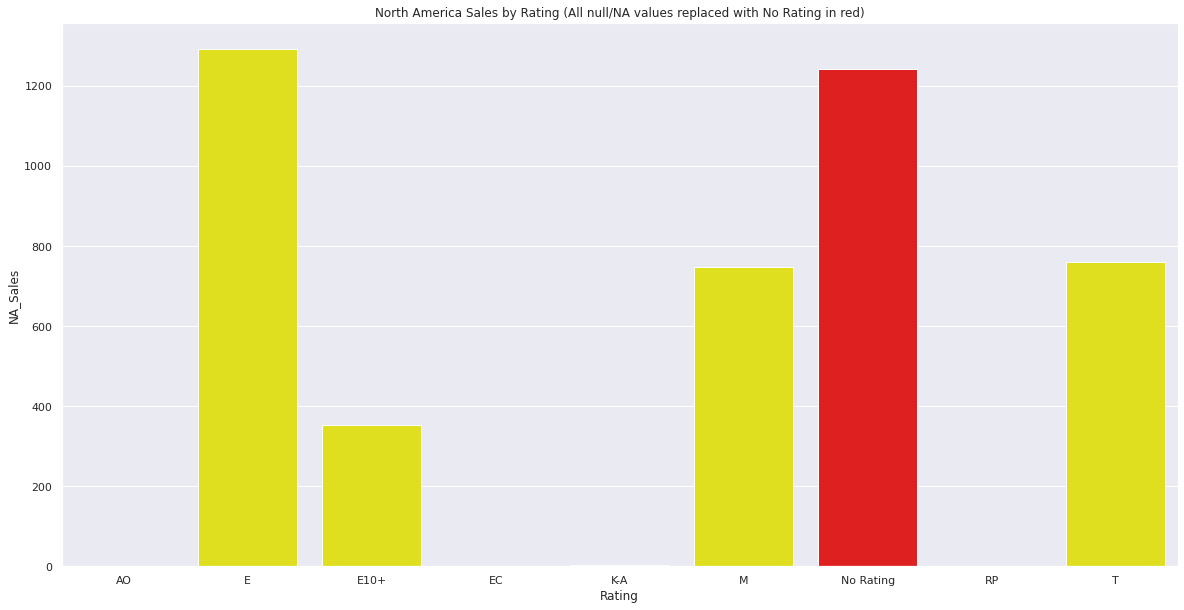

In [38]:
x = sales_by_game_rating['Rating']
y = sales_by_game_rating['NA_Sales']
clrs = ['red' if (y == "No Rating") else 'yellow' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_game_rating, palette=clrs).set(title="North America Sales by Rating (All null/NA values replaced with No Rating in red)")

[Text(0.5, 1.0, 'European Union Sales by Rating (All null/NA values replaced with No Rating in red)')]

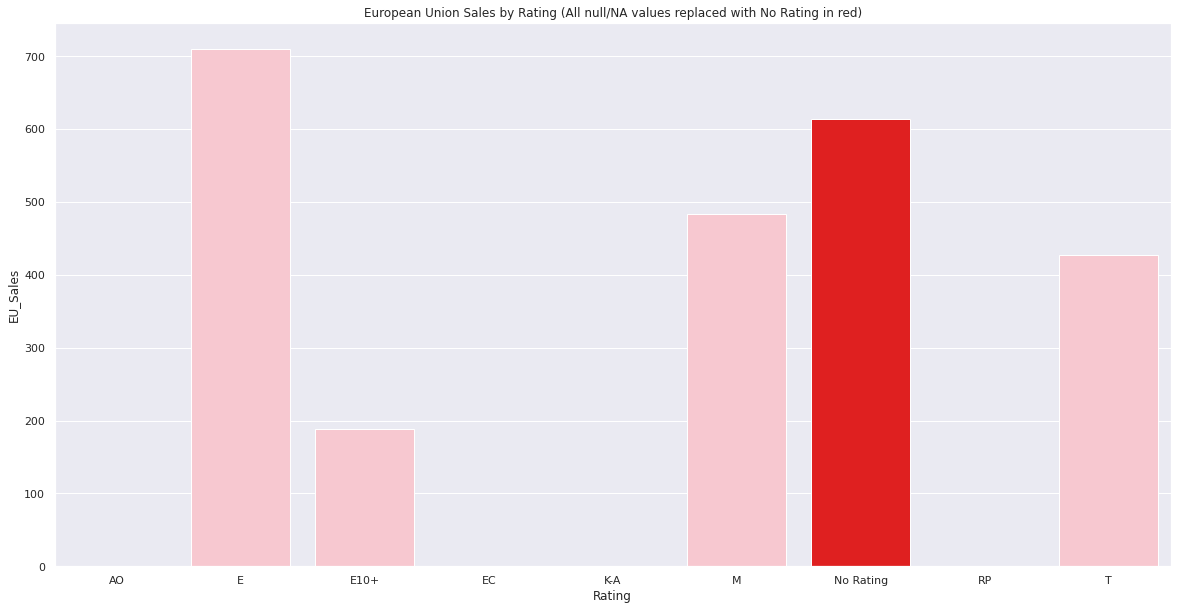

In [39]:
x = sales_by_game_rating['Rating']
y = sales_by_game_rating['EU_Sales']
clrs = ['red' if (y == "No Rating") else 'pink' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_game_rating, palette=clrs).set(title="European Union Sales by Rating (All null/NA values replaced with No Rating in red)")

Unsupervised Learning, Machine Learning, Data Clustering

In [40]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,No Developer,No Rating
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,No Developer,No Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,0.0,0.0,No Developer,No Rating
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,0.0,0.0,No Developer,No Rating
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,0.0,0.0,No Developer,No Rating
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,0.0,0.0,No Developer,No Rating


Which Developer sold the most?

In [66]:
#Nan values were replaced by "No Developer"
sales_by_game_developer = df.groupby('Developer').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].reset_index()
sales_by_game_developer_top_10 = sales_by_game_developer.nlargest(10, 'Global_Sales').reset_index()
sales_by_game_developer_top_10

,index,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1035,No Developer,1238.31,605.07,834.81,149.57,2829.46
1,1020,Nintendo,231.34,167.37,89.41,43.66,531.71
2,449,EA Sports,96.84,55.51,0.79,22.17,175.38
3,431,EA Canada,66.20,54.32,1.13,20.65,142.32
4,1540,Ubisoft,76.91,41.64,0.87,13.13,132.54
5,1221,Rockstar North,55.23,38.17,2.88,23.20,119.47
6,268,Capcom,46.66,26.68,32.88,9.35,115.71
7,1548,Ubisoft Montreal,51.62,41.88,1.73,13.04,108.31
8,1515,Treyarch,56.87,33.45,1.50,11.30,103.16
9,453,EA Tiburon,78.66,8.86,0.06,8.63,96.12


[Text(0.5, 1.0, 'Global Sales by Rating (All null/NA values replaced with No Developer in red)')]

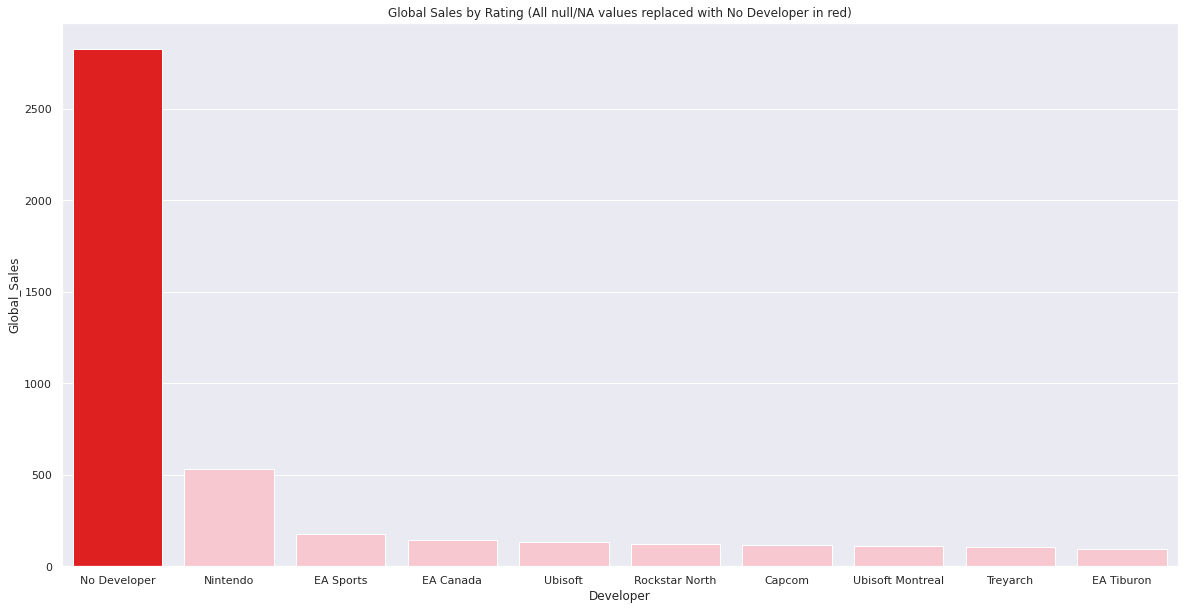

In [69]:
x = sales_by_game_developer_top_10['Developer']
y = sales_by_game_developer_top_10['Global_Sales']
clrs = ['red' if (y == "No Developer") else 'pink' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_game_developer_top_10, palette=clrs).set(title="Global Sales by Rating (All null/NA values replaced with No Developer in red)")

[Text(0.5, 1.0, 'Japan Sales by Rating (All null/NA values replaced with No Developer in red)')]

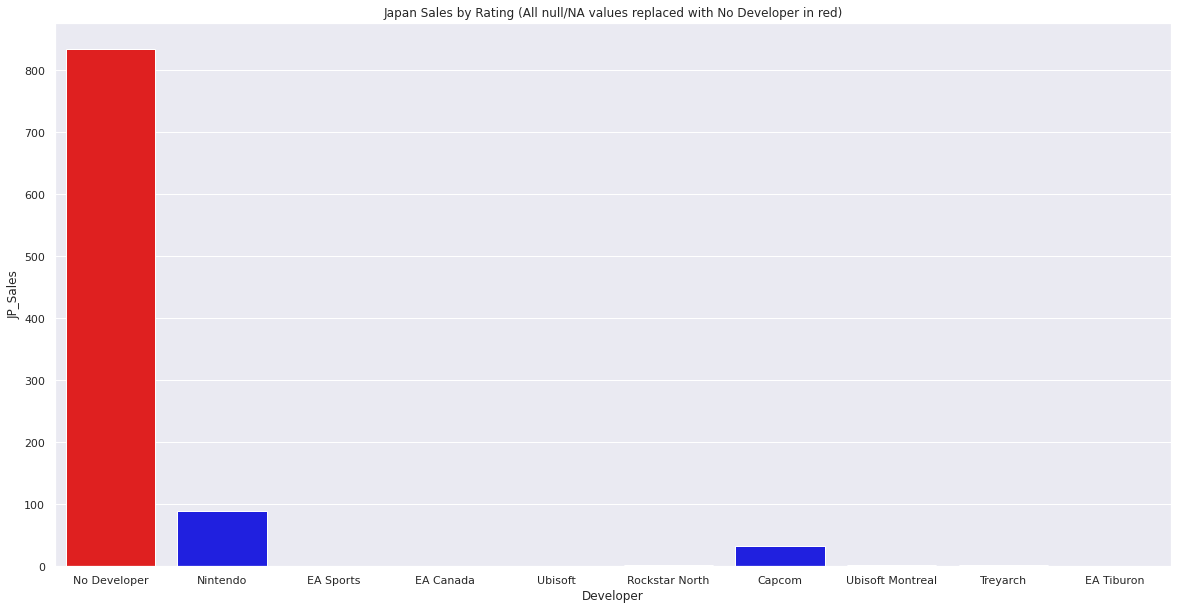

In [70]:
x = sales_by_game_developer_top_10['Developer']
y = sales_by_game_developer_top_10['JP_Sales']
clrs = ['red' if (y == "No Developer") else 'blue' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_game_developer_top_10, palette=clrs).set(title="Japan Sales by Rating (All null/NA values replaced with No Developer in red)")

Games like 

[Text(0.5, 1.0, 'European Union Sales by Rating (All null/NA values replaced with No Developer in red)')]

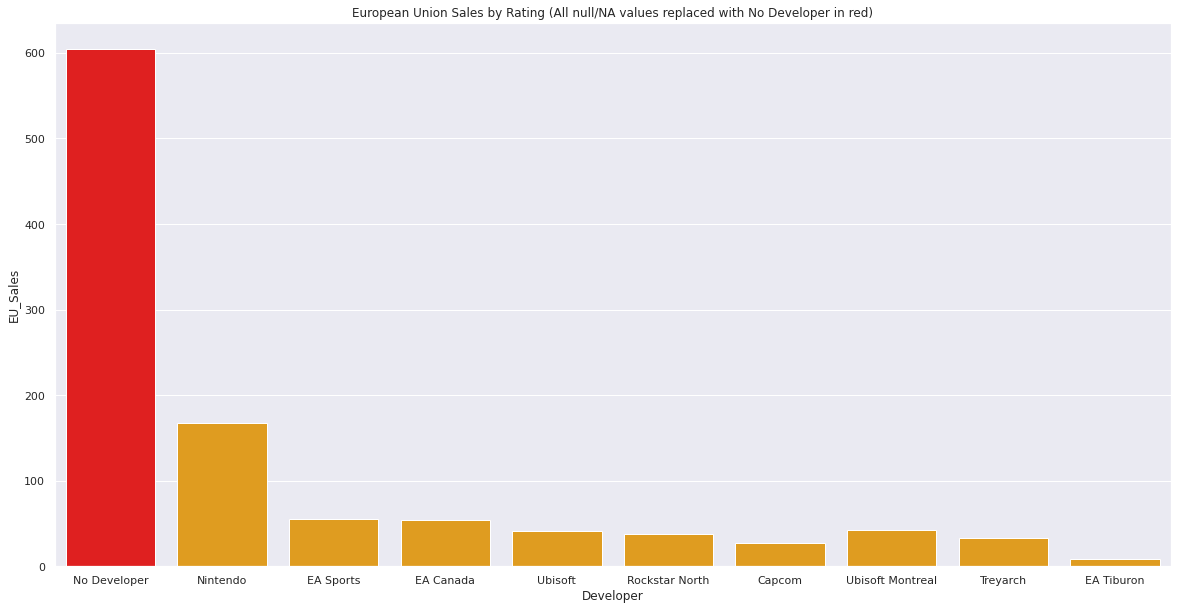

In [71]:
x = sales_by_game_developer_top_10['Developer']
y = sales_by_game_developer_top_10['EU_Sales']
clrs = ['red' if (y == "No Developer") else 'orange' for y in x]
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_game_developer_top_10, palette=clrs).set(title="European Union Sales by Rating (All null/NA values replaced with No Developer in red)")

Which Developers had the highest User and Critic Scores? Who had the best games? 

In [73]:
scores_by_game_developer = df.groupby('Developer').sum()[['User_Score', 'Critic_Score']].reset_index()
scores_by_game_developer_top_10 = scores_by_game_developer.nlargest(10, 'Critic_Score').reset_index()
scores_by_game_developer_top_10

,index,Developer,User_Score,Critic_Score
0,449,EA Sports,1094.2,12298.0
1,431,EA Canada,1152.1,12108.0
2,268,Capcom,1024.7,9901.0
3,815,Konami,799.2,8986.0
4,1540,Ubisoft,854.6,7928.0
5,453,EA Tiburon,641.5,7102.0
6,1548,Ubisoft Montreal,664.8,7012.0
7,1607,Visual Concepts,562.1,6086.0
8,1020,Nintendo,545.3,5726.0
9,477,Electronic Arts,497.8,5433.0


[Text(0.5, 1.0, 'Highest Critic Summed Score As per Developer')]

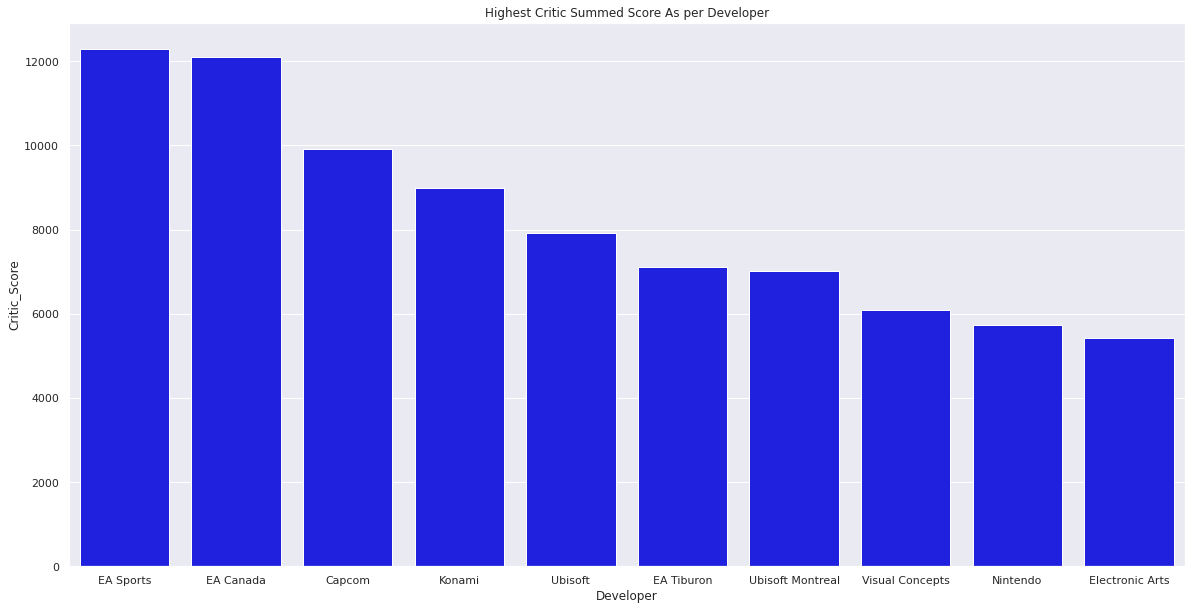

In [80]:
x = scores_by_game_developer_top_10['Developer']
y = scores_by_game_developer_top_10['Critic_Score']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = sales_by_game_developer_top_10, color='blue').set(title="Highest Critic Summed Score As per Developer")

Which Platforms had the highest Game Scores?

In [78]:
scores_by_platform = df.groupby('Platform').sum()[['User_Score', 'Critic_Score']].reset_index()
scores_by_platform_top_10 = scores_by_platform.nlargest(10, 'Critic_Score').reset_index()
scores_by_platform_top_10

,index,Platform,User_Score,Critic_Score
0,16,PS2,9464.9,89208.0
1,28,X360,6456.3,62853.0
2,17,PS3,5899.2,57714.0
3,13,PC,5438.1,54289.0
4,29,XB,4395.3,50648.0
5,4,DS,3625.0,45717.0
6,26,Wii,3775.9,36752.0
7,19,PSP,3043.1,31150.0
8,7,GC,2780.7,31131.0
9,6,GBA,1957.6,29509.0


[Text(0.5, 1.0, 'Highest Critic Summed Score As per Platform')]

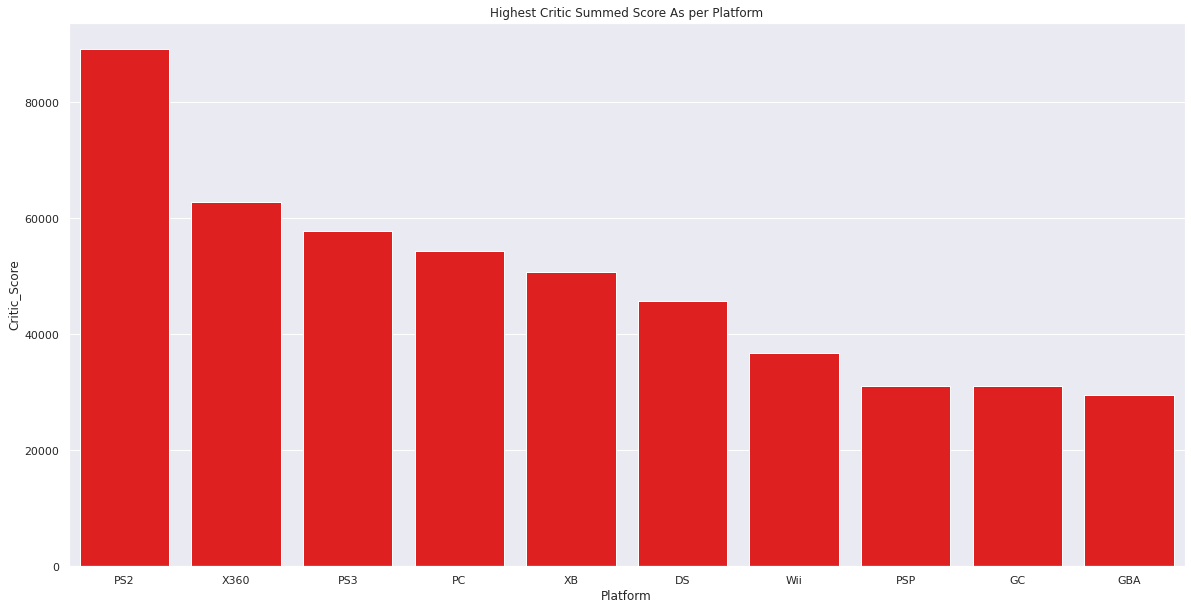

In [81]:
x = scores_by_platform_top_10['Platform']
y = scores_by_platform_top_10['Critic_Score']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = scores_by_platform_top_10, color='red').set(title="Highest Critic Summed Score As per Platform")

KMEANS Model of All Sales Data Columns

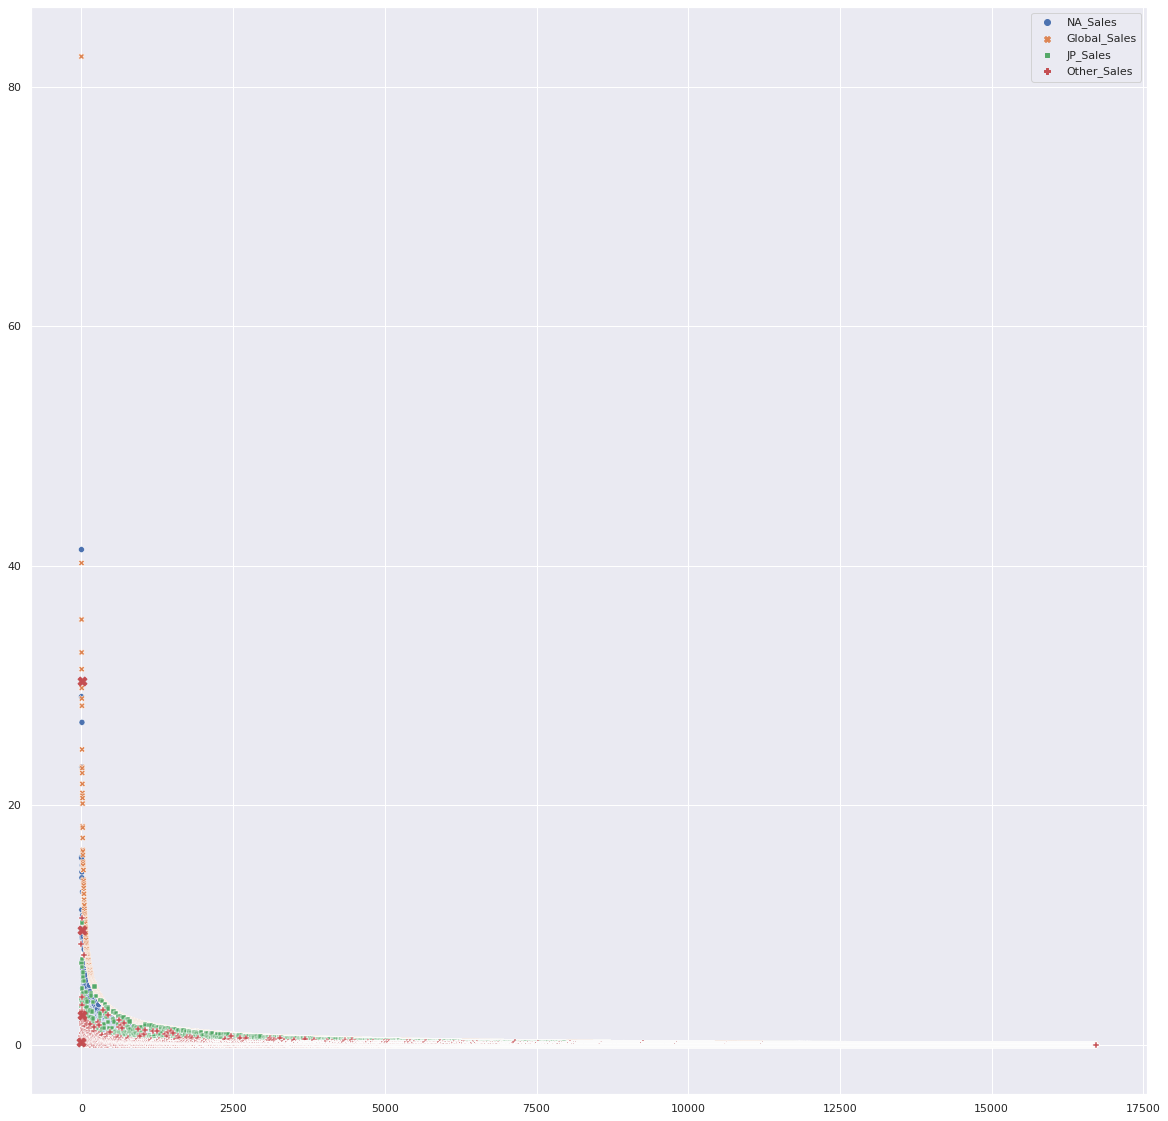

In [54]:
data = df[['NA_Sales', 'Global_Sales', 'JP_Sales', 'Other_Sales']]

kmeans = KMeans(n_clusters=4, init='random', random_state=50, max_iter=50, algorithm='full').fit(data)

#set size of plot
plt.figure(figsize=(20,20))

sns.scatterplot(data=data)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80)
plt.legend()
plt.show()

KMEANS Model of User and Critic Score Data Columns

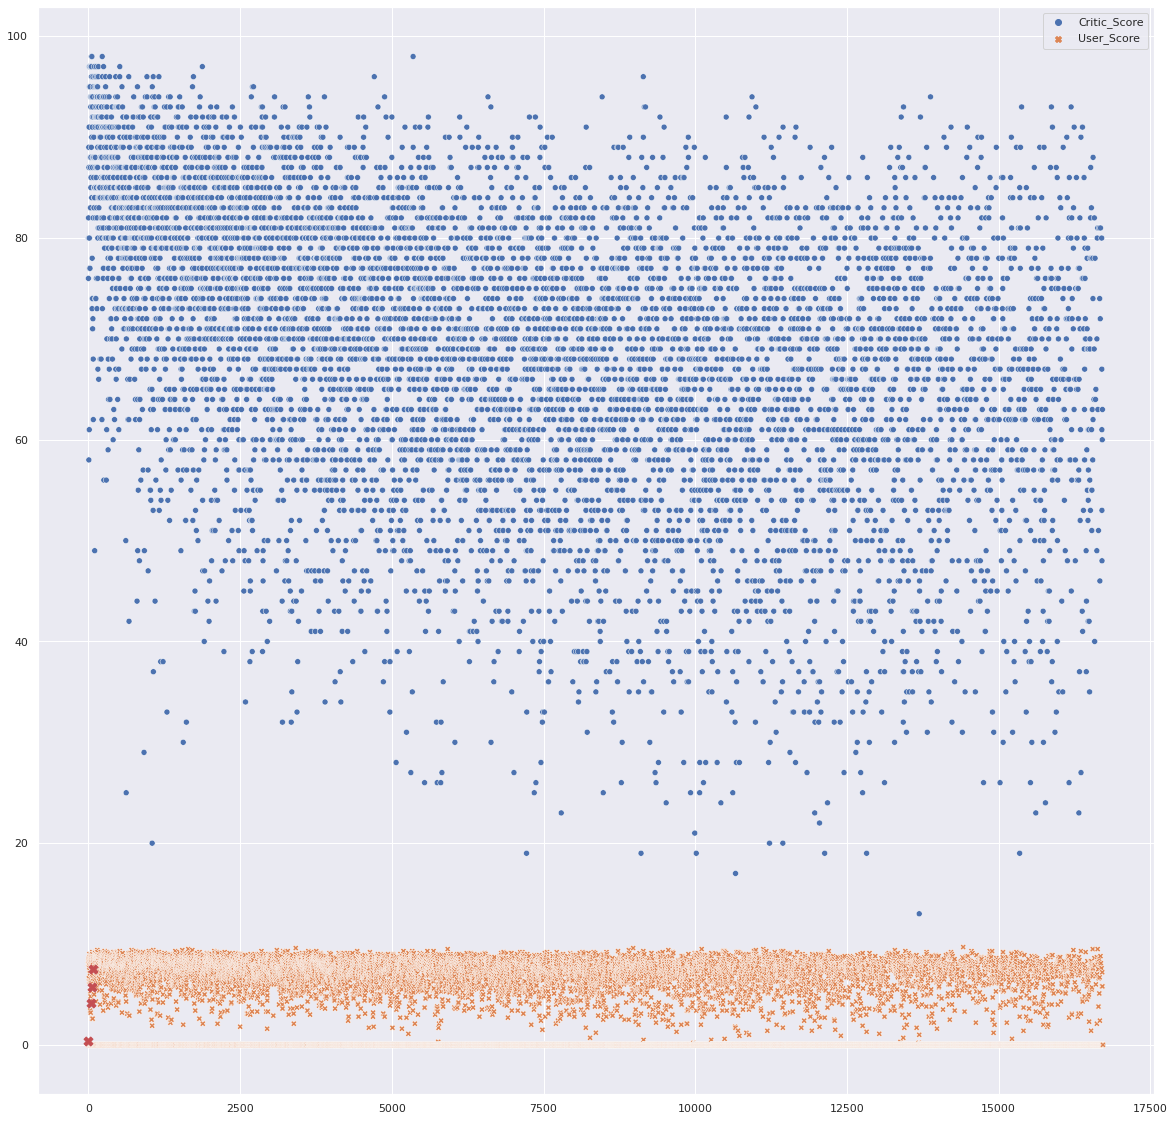

In [55]:
data = df[['Critic_Score', 'User_Score']]

kmeans = KMeans(n_clusters=4, init='random', random_state=50, max_iter=50, algorithm='full').fit(data)

#set size of plot
plt.figure(figsize=(20,20))

sns.scatterplot(data=data)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80)
plt.legend()
plt.show()

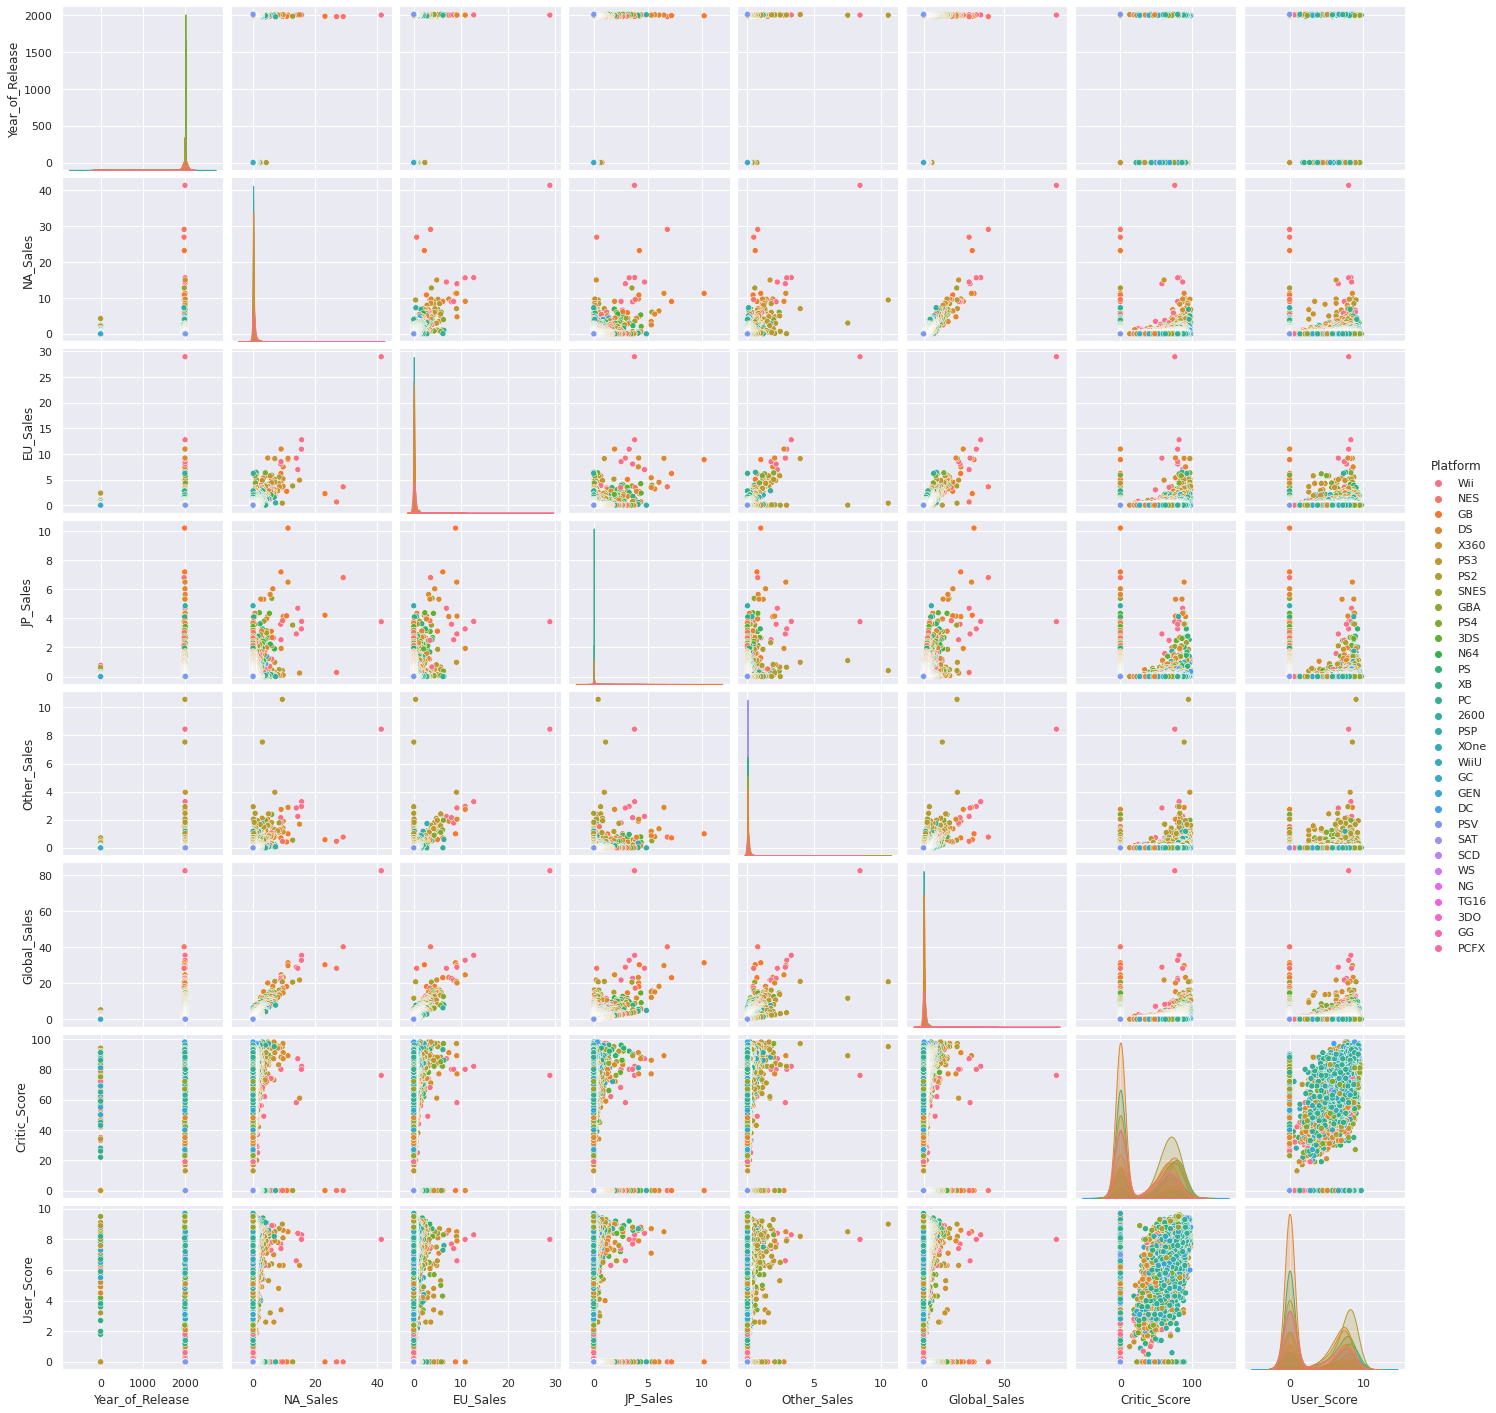

In [56]:
sns.pairplot(df, hue="Platform")

Regression/Correlation Analysis

In [57]:
df.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
Year_of_Release,1.000000,0.004694,0.013830,0.017930,0.011363,0.011920,-0.015690,0.000023
NA_Sales,0.004694,1.000000,0.765336,0.449598,0.638654,0.941010,0.153523,0.139368
EU_Sales,0.013830,0.765336,1.000000,0.435068,0.722796,0.901239,0.170648,0.152527
JP_Sales,0.017930,0.449598,0.435068,1.000000,0.291096,0.612300,-0.043703,-0.031994
Other_Sales,0.011363,0.638654,0.722796,0.291096,1.000000,0.749242,0.176191,0.165168
Global_Sales,0.011920,0.941010,0.901239,0.612300,0.749242,1.000000,0.148701,0.136321
Critic_Score,-0.015690,0.153523,0.170648,-0.043703,0.176191,0.148701,1.000000,0.818031
User_Score,0.000023,0.139368,0.152527,-0.031994,0.165168,0.136321,0.818031,1.000000


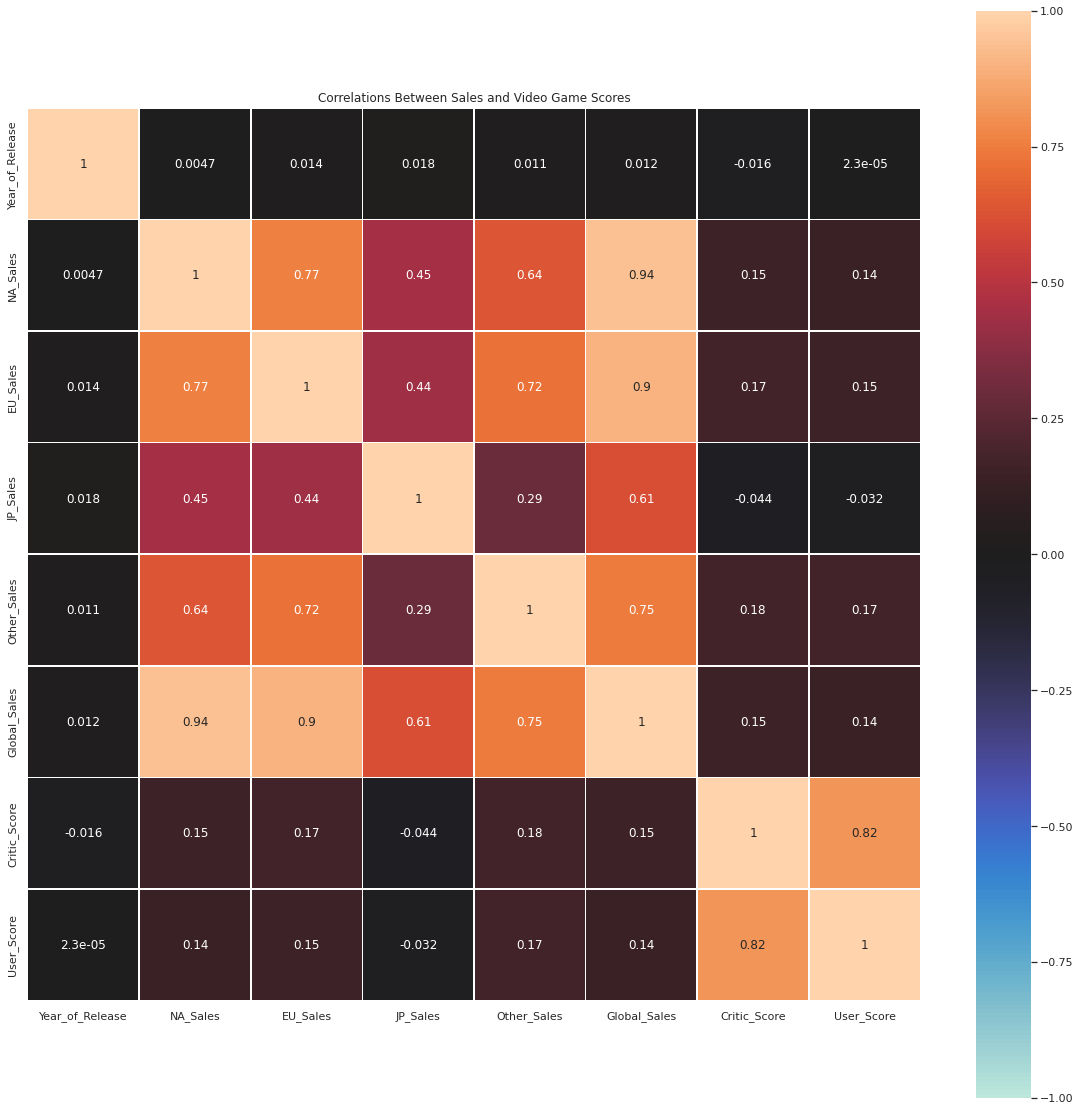

In [58]:
plt.figure(figsize=(20,20))
heat_map = sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0,
linewidth=.5,square=True, annot = True)
plt.title('Correlations Between Sales and Video Game Scores')
plt.show()

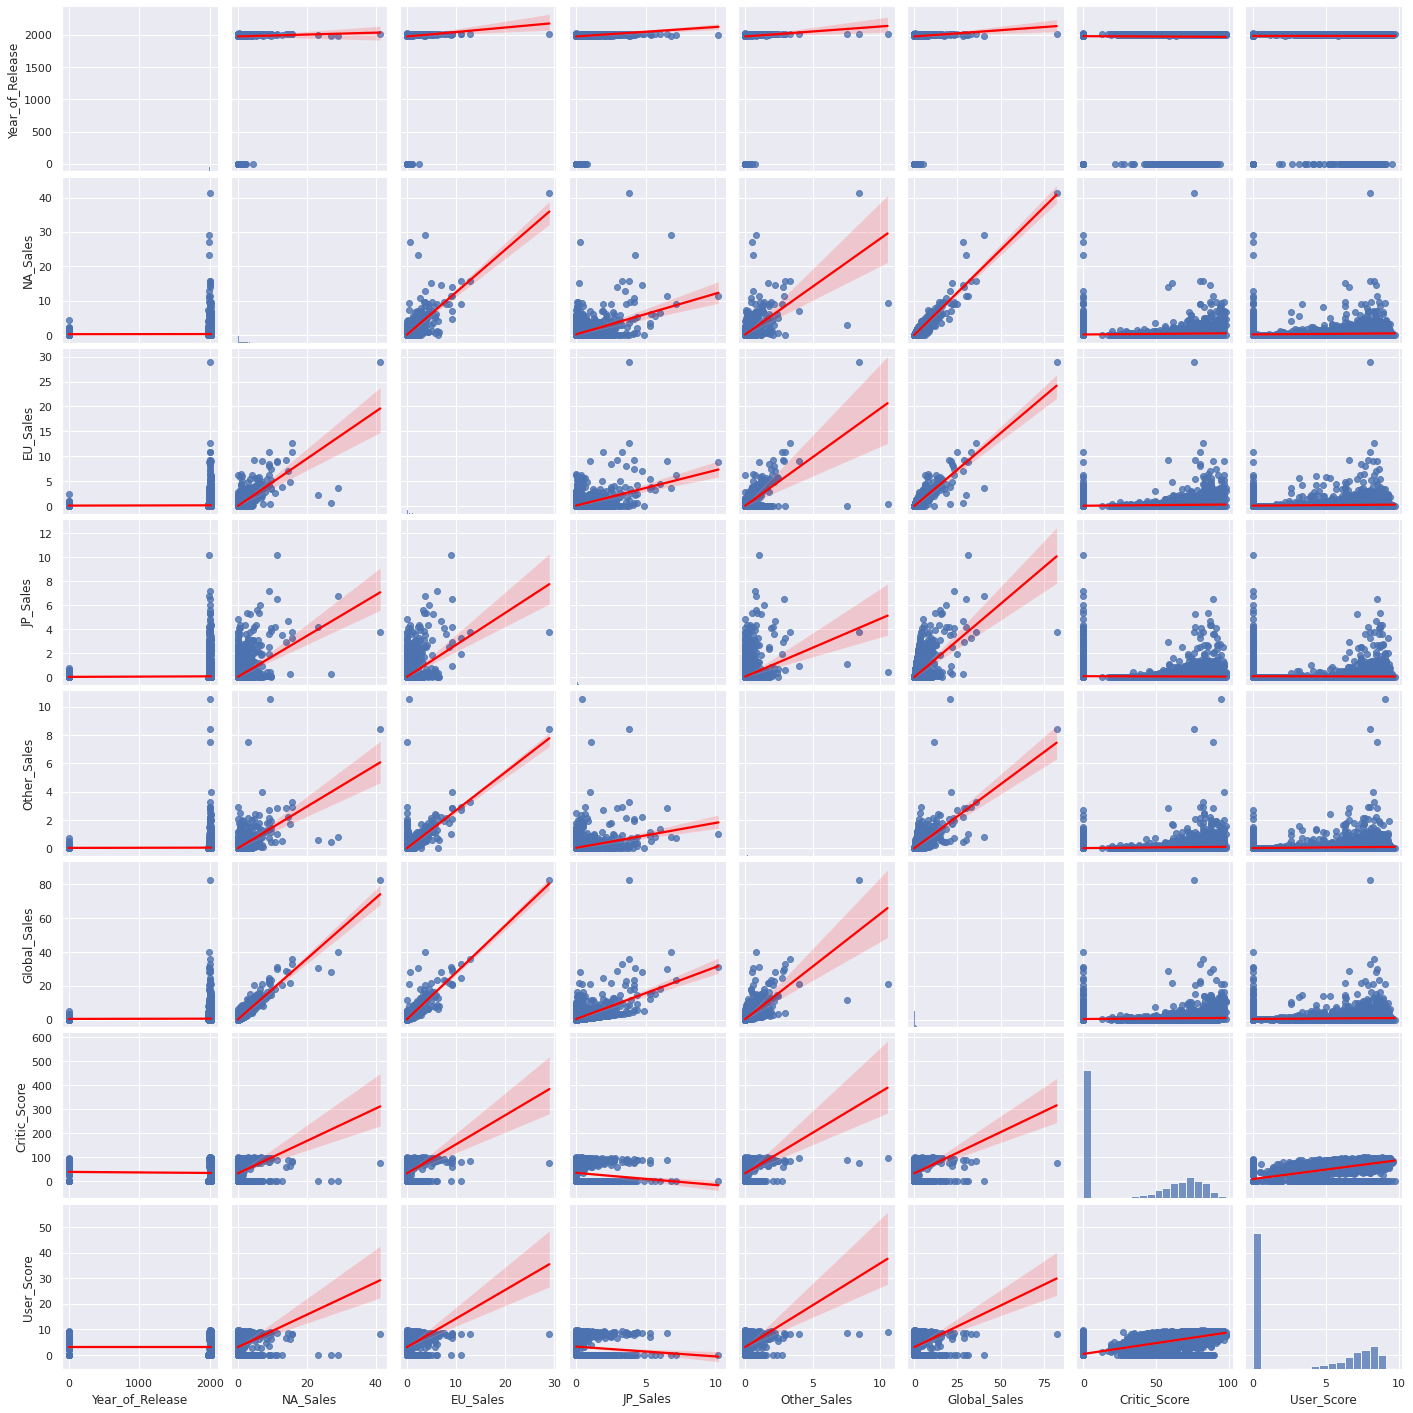

In [59]:
#seaborn pair-plot with red linear regression line
sns.pairplot(df, kind="reg", palette="Set2", plot_kws={'line_kws':{'color':'red'}})
plt.show()

Observations: EU, NA, Other, and Global Sales show a strong correlation with User and Critic Scores, except for Japan Sales; they have a slight negative correlation. Why? Strong positive correlation between Global Sales and Regional Sales. Becuase Global Sales account for those regions.